In [1]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# click_annotvcf annotations analysis

Created: **27/08/18**  
Last modified: **30/08/18**

**Goal:** This notebook studies the annotations added with click_annotvcf, see [/data/annotate_with_click_annotvcf](https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_click_annotvcf).  
This notebook is divided in 3 parts:
* **1. Get click_annotvcf annotations**
* **2. IMPACT annotations vs VAGrENT annotations vs VEP annotations**
* **4. Other VEP annotations**

**Refs:**
* [data/annotate_with_click_annotvcf](
https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_click_annotvcf)

In [2]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [3]:
impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact <- add_features("../../../data/", impact, annotations = TRUE)

## Get click_annotvcf annotations

Get the features from `click_annotvcf_IMPACT_mutations_180508.txt` (impact annotated by the click_annotvcf pipeline).

### Get the raw data

In [4]:
impact_annotated <- read.table("../../../data/annotate_with_click_annotvcf/click_annotvcf_IMPACT_mutations_180508.txt",
                               sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")

In [5]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 157

[1] 406770

ID_VARIANT    TARGET_NAME REFERENCE_NAME CHR START   END     REF ALT
1 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
2 1_2487954_G_A NA          NA             1   2487954 2487954 G   A  
3 1_2487984_C_A NA          NA             1   2487984 2487984 C   A  
4 1_2487998_C_G NA          NA             1   2487998 2487998 C   G  
5 1_2487998_C_T NA          NA             1   2487998 2487998 C   T  
6 1_2488032_A_G NA          NA             1   2488032 2488032 A   G  
  CONTEXT_5 CHANGE CONTEXT_3 QUAL CALLED_BY PASSED_BY NUMBER_OF_CALLERS
1 TGGAA     C      GGTGC     NA   NA        NA        0                
2 GCTCG     A      GTTCT     NA   NA        NA        0                
3 CGAGG     A      GGATT     NA   NA        NA        0                
4 TTTCT     G      TTTCT     NA   NA        NA        0                
5 TTTCT     T      TTTCT     NA   NA        NA        0                
6 CAGCA     G      TGGCG     NA   NA        NA        0                
  FLAGS_ALL TARGET_VAF_MEAN TARGET_VAF_STD REFERENCE_VAF_MEAN REFERENCE_VAF_STD
1 PASS      NA              NA             NA                 NA               
2 PASS      NA              NA             NA                 NA               
3 PASS      NA              NA             NA                 NA               
4 PASS      NA              NA             NA                 NA               
5 PASS      NA              NA             NA                 NA               
6 PASS      NA              NA             NA                 NA               
  mutect_TARGET_VAF mutect_TARGET_DEPTH mutect_REFERENCE_VAF
1 NA                NA                  NA                  
2 NA                NA                  NA                  
3 NA                NA                  NA                  
4 NA                NA                  NA                  
5 NA                NA                  NA                  
6 NA                NA                  NA                  
  mutect_REFERENCE_DEPTH mutect_DIRPROP mutect_READS_FORWARD
1 NA                     NA             NA                  
2 NA                     NA             NA                  
3 NA                     NA             NA                  
4 NA                     NA             NA                  
5 NA                     NA             NA                  
6 NA                     NA             NA                  
  mutect_READS_REVERSE strelka_TARGET_VAF strelka_TARGET_DEPTH
1 NA                   NA                 NA                  
2 NA                   NA                 NA                  
3 NA                   NA                 NA                  
4 NA                   NA                 NA                  
5 NA                   NA                 NA                  
6 NA                   NA                 NA                  
  strelka_REFERENCE_VAF strelka_REFERENCE_DEPTH caveman_TARGET_VAF
1 NA                    NA                      NA                
2 NA                    NA                      NA                
3 NA                    NA                      NA                
4 NA                    NA                      NA                
5 NA                    NA                      NA                
6 NA                    NA                      NA                
  caveman_TARGET_DEPTH caveman_REFERENCE_VAF caveman_REFERENCE_DEPTH
1 NA                   NA                    NA                     
2 NA                   NA                    NA                     
3 NA                   NA                    NA                     
4 NA                   NA                    NA                     
5 NA                   NA                    NA                     
6 NA                   NA                    NA                     
  caveman_DIRPROP caveman_READS_FORWARD caveman_READS_REVERSE CAVEMAN_DS
1 NA              NA                    NA                    NA        
2 NA              NA                    NA      

We keep the following features:
* `id_colnames`: variant identification columns (chromosome, start position, ...)
* `vag_colnames`: VAGrENT most deleterious annotation
* `vep_colnames`: VEP v92 annotations
     * `VEP_BIOTYPE`: Biotype of transcript or regulatory feature
     * ...
* `vep_add_colnames`: VEP v92 annotations (polyphen: 2.2.2, sift: sift5.2.2, COSMIC v81)
    * `VEP_IMPACT`: Subjective impact classification of consequence type
    * `VEP_CLIN_SIG`: ClinVar clinical significance of the dbSNP variant
    * `VEP_AF`: Frequency of existing variant in 1000 Genomes combined population
    * `VEP MAX_AF`: Maximum observed allele frequency in 1000 Genomes, ESP and ExAC/gnomAD
    * `VEP MAX_AF_POPS`: Populations in which maximum allele frequency was observed
    * ...

In [6]:
id_colnames  <- c("ID_VARIANT", "CHR", "START", "END", "REF", "ALT")
vag_colnames <- c("VAG_VT", "VAG_GENE", "VAG_cDNA_CHANGE", "VAG_PROTEIN_CHANGE", "VAG_EFFECT")
vep_colnames <- c("VEP_Consequence", "VEP_SYMBOL", "VEP_HGVSc", "VEP_HGVSp", "VEP_Amino_acids", "VEP_VARIANT_CLASS", "VEP_BIOTYPE")
vep_add_colnames <- c("VEP_IMPACT", "VEP_CLIN_SIG",
                       "VEP_AF", "VEP_MAX_AF", "VEP_MAX_AF_POPS", "VEP_gnomAD_AF",
                       "VEP_SIFT", "VEP_PolyPhen", "VEP_COSMIC_CNT")

colnames_to_keep <- c(id_colnames, vag_colnames, vep_colnames, vep_add_colnames)

impact_annotated <- impact_annotated[, colnames_to_keep]

### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `CHR`\_`START`\_`REF`\_`ALT` for `impact_annotated`, however because the file was annotated from `impact` converted to `.vcf` format, there's a correction to be made for `INS` and `DEL` (ex: for insertions the syntax is `-/A` for `impact` vs `T/TA` for `impact_annotated`).

In [7]:
get_join_key <- function(data) {
    
    # if insertion or deletion
    if (substr(data["REF"], 1, 1) == substr(data["ALT"], 1, 1) &
        (nchar(data["REF"]) == 1 | nchar(data["ALT"]) == 1)) {
        
        # remove leading base
        data["REF"] = substr(data["REF"], 2, nchar(data["REF"]))
        data["ALT"] = substr(data["ALT"], 2, nchar(data["ALT"]))
        
        # different correction for insertion vs deletion
        if (nchar(data["REF"]) == 0)
            data["REF"] = '-'
        else {
            data["ALT"] = '-'
            data["START"] = as.numeric(data["START"]) + 1
        }
    }

    return (gsub(' ', '', (paste(data["CHR"], data["START"], data["REF"], data["ALT"], sep = "_"))))
}

impact_annotated$join_key <- apply(impact_annotated, 1, get_join_key)
head(impact_annotated$join_key)

[1] "1_2487766_T_C" "1_2487954_G_A" "1_2487984_C_A" "1_2487998_C_G"
[5] "1_2487998_C_T" "1_2488032_A_G"

**Verification 1** Make sure every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

Somehow some insertions and deletions don't have the same format, but have the original `.vcf` format.

In [8]:
is_unmatched <- which(! impact$mut_key %in% impact_annotated$join_key)
table(impact$Variant_Type[is_unmatched]) # only DEL and INS
head(impact[is_unmatched, c("Variant_Type", "Reference_Allele", "Tumor_Seq_Allele2")]) # which have the .vcf format
head(impact$cDNA_change[is_unmatched], 10)


DEL INS 
 78   9 

Variant_Type Reference_Allele                                           
8669  DEL          GAGCAGCAGC                                                 
22259 DEL          GTGATAGCACTGAGAGCACTGCGAACAGGCAAGGAGGTGGCCCTCTGCCCCCCGGCCAA
33515 DEL          AACCCATGTATGAAGT                                           
36147 DEL          GCCTCCGGCCCCGAAGAGCCCCT                                    
40602 DEL          ACCTGCCAGAG                                                
41558 DEL          AT                                                         
      Tumor_Seq_Allele2
8669  G                
22259 G                
33515 A                
36147 G                
40602 A                
41558 A

[1] "c.186_196delinsCT"                    
 [2] "c.4157_4216delinsCA"                  
 [3] "c.1648_1664delinsCA"                  
 [4] "c.491_514delinsCT"                    
 [5] "c.194-9_196delinsTG"                  
 [6] "c.320_322delinsTA"                    
 [7] "c.2033_2035delinsCT"                  
 [8] "c.6835_6836delinsGTA"                 
 [9] "c.1726_1727delinsATGATCACAAATGGGAGTGA"
[10] "c.1726_1727delinsATGATCACAAATGGGAGTGA"

In [9]:
is_matched <- which(impact$mut_key %in% impact_annotated$join_key)
head(impact$cDNA_change[is_matched][impact$Variant_Type == "INS"], 10)

[1] "c.2538dupT"          "c.875dupA"           "c.906_907insC"      
 [4] "c.903_906delinsACAC" "c.1344dupA"          "c.620dupA"          
 [7] "c.2206dupA"          "c.2864dupC"          "c.1003dupT"         
[10] "c.1364dupA"

!!! Not sure what to do, remove them from mow.

In [10]:
impact <- impact[is_matched,]

***

***

***  

For these mutations we will use `ID_VARIANT` as a `join_key` (they were still annotated as no change was made to them during the conversion to `.vcf`). We won't affect any other mutation by modyfing these `join_key`.

In [ ]:
# are the corrected mut_key elsewhere in the dataset?

correct_ref_and_alt <- function(data, correct_del_start_position) {
    
    data$Reference_Allele <- substr(data$Reference_Allele, 2, nchar(data$Reference_Allele))
    data$Tumor_Seq_Allele2 <- substr(data$Tumor_Seq_Allele2, 2, nchar(data$Tumor_Seq_Allele2))
    
    data$Reference_Allele[data$Variant_Type == "INS"] <- '-'
    data$Tumor_Seq_Allele2[data$Variant_Type == "DEL"] <- '-'
    
    if (correct_del_start_position)
        data$Start_Position <- as.numeric(data$Start_Position) + 1
    
    return (data)
}

head(correct_ref_and_alt(impact[is_unmatched,], TRUE)[,c("Variant_Type", "Reference_Allele", "Tumor_Seq_Allele2")])
table(correct_ref_and_alt(impact[is_unmatched,], TRUE)$mut_key %in% impact$mut_key[! is_unmatched])
table(correct_ref_and_alt(impact[is_unmatched,], FALSE)$mut_key %in% impact$mut_key[! is_unmatched])

In [ ]:
# corresponding to impact_annotated$ID_VARIANT
table(unique(impact$mut_key[is_unmatched]) %in% impact_annotated$ID_VARIANT)

In [ ]:
table(impact$mut_key[is_unmatched] %in% impact$mut_key[! is_unmatched])

However, some mutations having the same key but in the not `.vcf` format (eg `AGCAGCAGC_-` instead of `GAGCAGCAGC_G`) would be lost if we would just replace the `impact_annotated` `join_key` for these mutations. Thus, we will create new rows having the good `join_key` especially for these mutations:

In [ ]:
table(unique(impact$mut_key[is_unmatched]) %in% impact_annotated$ID_VARIANT)
table(impact_annotated$ID_VARIANT %in% impact$mut_key[is_unmatched])

In [ ]:
to_change <- which(impact_annotated$ID_VARIANT %in% impact$mut_key[is_unmatched])

#impact_annotated$join_key[to_change] <- impact_annotated$ID_VARIANT[to_change]

In [ ]:
correct_ref_and_alt <- function(data) {
    
    data$Reference_Allele = substr(data$Reference_Allele, 2, nchar(data$Reference_Allele))
    data$Tumor_Seq_Allele2 = substr(data$Tumor_Seq_Allele2, 2, nchar(data$Tumor_Seq_Allele2))
    
    data$Reference_Allele[data$Variant_Type == "INS"] <- '-'
    data$Tumor_Seq_Allele2[data$Variant_Type == "DEL"] <- '-'
    
    #data["START"] = as.numeric(data["START"]) + 1
    
    return (data)
}

#impact2[is_unmatched,] <- correct_ref_and_alt(impact2[is_unmatched,])

#is_unmatched <- which(! impact2$mut_key %in% impact$mut_key)
#nrow(impact2[is_unmatched,])
#head(impact2[is_unmatched, c("Variant_Type", "Reference_Allele", "Tumor_Seq_Allele2")], 100)

In [ ]:
is_unmatched <- which(! impact$mut_key %in% impact_annotated$join_key)
table(impact$Variant_Type[is_unmatched]) # only DEL and INS
head(impact[is_unmatched, c("Variant_Type", "Reference_Allele", "Tumor_Seq_Allele2")]) # which have the .vcf format

In [ ]:
head(impact$cDNA_change[impact$Variant_Type == "INS"])
nrow(impact)

**Verification 2** The features are unique for each `join_key`:

In [11]:
impact_annotated <- unique(impact_annotated)

In [12]:
nrow(impact_annotated %>% group_by(join_key) %>% filter(n() > 1))

[1] 0

In [13]:
colnames_to_keep <- c(vag_colnames, vep_colnames, vep_add_colnames)

In [14]:
impact[, colnames_to_keep] <- left_join(impact, impact_annotated,
                                        by = c("mut_key" = "join_key"))[, c(vag_colnames, vep_colnames, vep_add_colnames)]

In [15]:
head(impact)

Hugo_Symbol Chromosome Start_Position End_Position Consequence      
1 TP53        17           7577515        7577515    nonsynonymous_SNV
2 ARID1A      1           27101572       27101572    synonymous_SNV   
3 PTPRS       19           5244030        5244030    synonymous_SNV   
4 PIK3R3      1           46521514       46521514    nonsynonymous_SNV
5 ATR         3          142178126      142178126    nonsynonymous_SNV
6 PDGFRA      4           55139732       55139732    nonsynonymous_SNV
  Variant_Type Reference_Allele Tumor_Seq_Allele2 Tumor_Sample_Barcode
1 SNP          T                G                 P-0000012-T02-IM3   
2 SNP          C                G                 P-0000012-T02-IM3   
3 SNP          C                G                 P-0000012-T02-IM3   
4 SNP          G                C                 P-0000012-T03-IM3   
5 SNP          C                A                 P-0000012-T03-IM3   
6 SNP          T                A                 P-0000012-T03-IM3   
  cDNA_change HGVSp_Short t_depth t_vaf   t_alt_count n_depth n_vaf  
1 c.766A>C    p.T256P     227     0.50220 114          569    0.00000
2 c.4854C>G   p.P1618P    281     0.07829  22          879    0.00000
3 c.1452G>C   p.L484L     299     0.37793 113          730    0.00274
4 c.894C>G    p.I298M     733     0.17599 129         1243    0.00000
5 c.7292G>T   p.R2431M    482     0.17427  84          581    0.00172
6 c.1393T>A   p.L465M     570     0.20351 116          811    0.00000
  n_alt_count t_ref_plus_count t_ref_neg_count t_alt_plus_count t_alt_neg_count
1 0            59               54             58               56             
2 0           126              129             11               11             
3 2            97               87             61               52             
4 0           288              316             61               68             
5 1           221              177             46               38             
6 0           252              202             66               50             
  confidence_class sample_coverage mut_key        
1 AUTO_OK          344             17_7577515_T_G 
2 UNKNOWN          344             1_27101572_C_G 
3 UNKNOWN          344             19_5244030_C_G 
4 AUTO_OK          428             1_46521514_G_C 
5 AUTO_OK          428             3_142178126_C_A
6 AUTO_OK          428             4_55139732_T_A 
  sample_mut_key                    frequency_in_normals Kaviar_AF cosmic_count
1 P-0000012-T02-IM3_17_7577515_T_G  0                    0.0e+00   1           
2 P-0000012-T02-IM3_1_27101572_C_G  0                    0.0e+00   0           
3 P-0000012-T02-IM3_19_5244030_C_G  0                    0.0e+00   0           
4 P-0000012-T03-IM3_1_46521514_G_C  0                    0.0e+00   0           
5 P-0000012-T03-IM3_3_142178126_C_A 0                    6.5e-06   0           
6 P-0000012-T03-IM3_4_55139732_T_A  0                    0.0e+00   0           
  VAG_VT VAG_GENE VAG_cDNA_CHANGE VAG_PROTEIN_CHANGE VAG_EFFECT          
1 Sub    TP53     c.766A>C        p.T256P            non_synonymous_codon
2 Sub    ARID1A   c.4854C>G       p.P1618P           synonymous_codon    
3 Sub    PTPRS    c.1452G>C       p.L484L            synonymous_codon    
4 Sub    PIK3R3   c.1032C>G       p.I344M            non_synonymous_codon
5 Sub    ATR      c.7292G>T       p.R2431M           non_synonymous_codon
6 Sub    PDGFRA   c.1393T>A       p.L465M            non_synonymous_codon
  VEP_Consequence    VEP_SYMBOL VEP_HGVSc                  
1 missense_variant   TP53       ENST00000269305.4:c.766A>C 
2 synonymous_variant ARID1A     ENST00000324856.7:c.4854C>G
3 synonymous_variant PTPRS      ENST00000357368.4:c.1452G>C
4 missense_variant   PIK3R3     ENST00000262741.5:c.894C>G 
5 missense_variant   ATR        ENST00000350721.4:c.7292G>T
6 missense_variant   PDGFRA     ENST00000257290.5:c.1393T>A
  VEP_HGVSp                      VEP_Amino_acids VEP_VARIANT_CLASS
1 ENSP00000269305.4:p.Thr256Pro  T/P

In [16]:
impact_backup <- impact

### Deal with `NA` values

In [17]:
count_na <- function(data) {
    return (sum(is.na(data)))
}

In [18]:
replace_na <- function(data, feature_name, replace_value){
    data[is.na(data[,feature_name]), feature_name] <- replace_value
    
    return (data)
}

#### VAGrENT

In [19]:
for (c in vag_colnames) 
    print(sprintf("%18s: %d", c, count_na(impact[,c])))

[1] "            VAG_VT: 0"
[1] "          VAG_GENE: 158"
[1] "   VAG_cDNA_CHANGE: 515"
[1] "VAG_PROTEIN_CHANGE: 515"
[1] "        VAG_EFFECT: 158"


158 mutations have `VAG_GENE` and `VAG EFFECT` = `NA`, 515 mutations have `VAG_cDNA_CHANGE` and `VAG_PROTEIN_CHANGE` = `NA` (including the 158 preceding ones).

In [20]:
nrow(impact[is.na(impact$VAG_GENE) & is.na(impact$VAG_EFFECT),]) == 158
nrow(impact[is.na(impact$VAG_cDNA_CHANGE) & is.na(impact$VAG_PROTEIN_CHANGE),]) == 515

table(impact$mut_key[is.na(impact$VAG_GENE)] %in% impact$mut_key[is.na(impact$VAG_cDNA_CHANGE)])

[1] TRUE

[1] TRUE


TRUE 
 158 

[1] "Number of different genes:  97"
[1] "Number of different genes:  130"


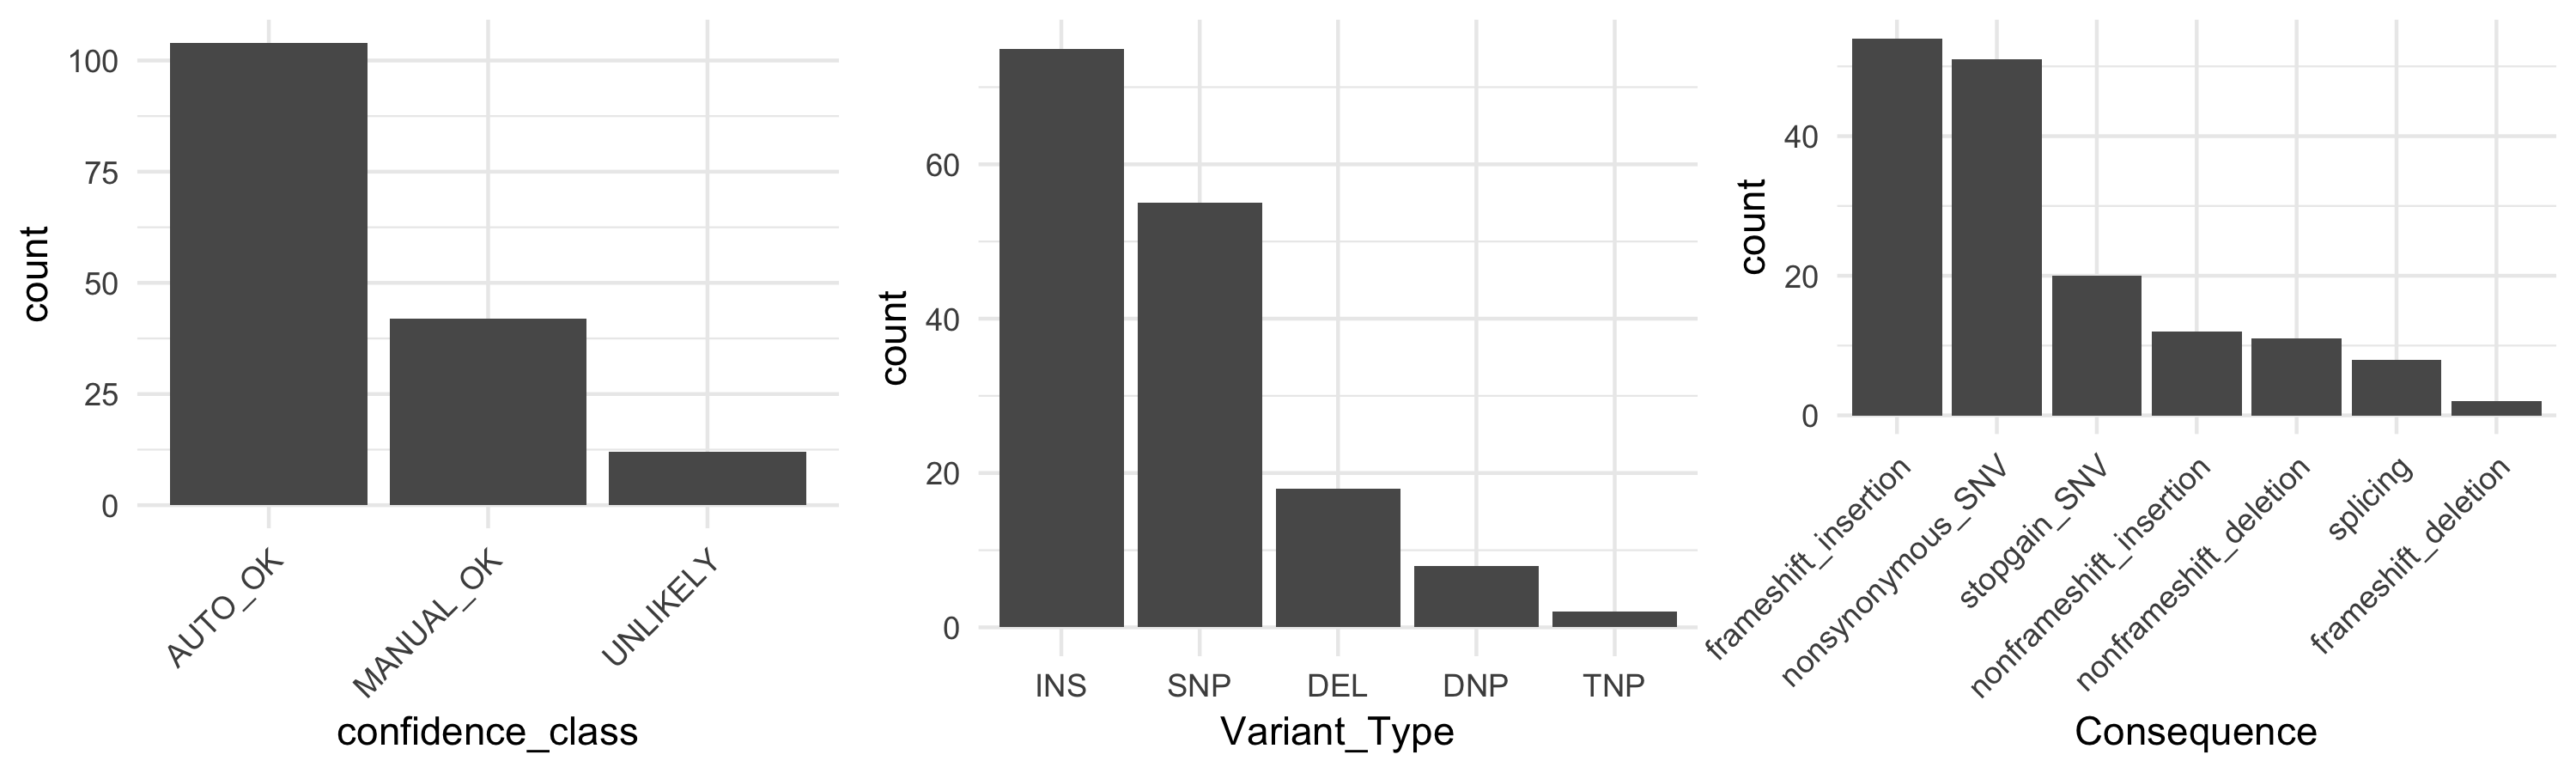

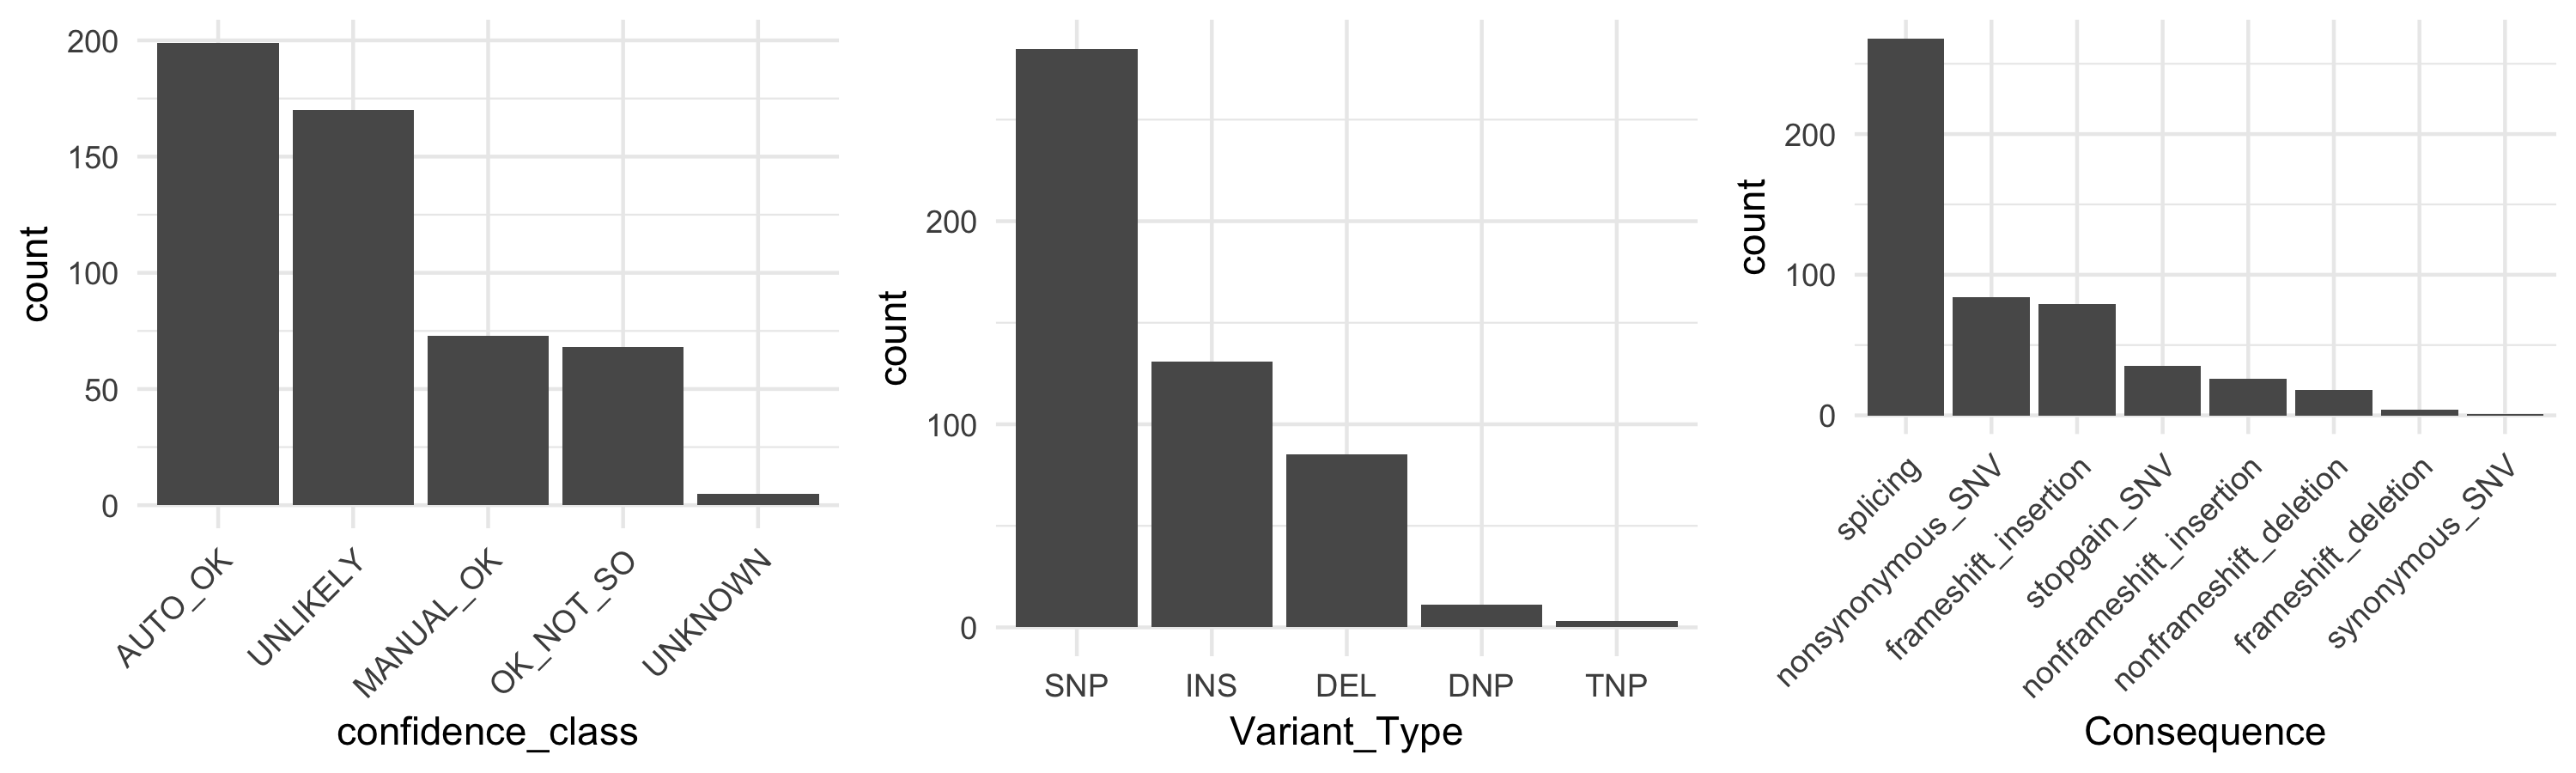

In [21]:
get_possible_correlations(impact[is.na(impact$VAG_GENE),])
get_possible_correlations(impact[is.na(impact$VAG_cDNA_CHANGE),])

In [22]:
impact <- replace_na(impact, "VAG_GENE"          , "unknown")
impact <- replace_na(impact, "VAG_EFFECT"        , "unknown")
impact <- replace_na(impact, "VAG_cDNA_CHANGE"   , "unknown")
impact <- replace_na(impact, "VAG_PROTEIN_CHANGE", "unknown")

#### VEP

In [23]:
for (c in vep_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "  VEP_Consequence: 0"
[1] "       VEP_SYMBOL: 49"
[1] "        VEP_HGVSc: 71"
[1] "        VEP_HGVSp: 8811"
[1] "  VEP_Amino_acids: 8794"
[1] "VEP_VARIANT_CLASS: 0"
[1] "      VEP_BIOTYPE: 49"


49 mutations have `VEP_BIOTYPE` and `VEP_SYMBOL` = `NA`, because they are considered as `intergenic` by VEP.

In [24]:
nrow(impact[is.na(impact$VEP_BIOTYPE) & is.na(impact$VEP_SYMBOL),]) == 49
length(unique(impact$mut_key[is.na(impact$VEP_BIOTYPE)]))
table(impact$VEP_Consequence[is.na(impact$VEP_BIOTYPE)])
table(impact$Consequence[is.na(impact$VEP_BIOTYPE)])

[1] TRUE

[1] 49


intergenic_variant 
                49 


 nonframeshift_deletion nonframeshift_insertion       nonsynonymous_SNV 
                     10                       4                      26 
               splicing            stopgain_SNV 
                      1                       8 

8811 mutations have `VEP_HGVSp` = `NA`, most of them being splicing mutations.

In [25]:
get_table(impact$VEP_Consequence[is.na(impact$VEP_HGVSp)]) %>% filter(count >= 50)
get_table(impact$Consequence[is.na(impact$VEP_HGVSp)])

values                                                                             
1  splice_acceptor_variant                                                            
2  splice_donor_variant                                                               
3  splice_region_variant&intron_variant                                               
4  splice_acceptor_variant&coding_sequence_variant&intron_variant                     
5  splice_donor_variant&coding_sequence_variant&intron_variant                        
6  intron_variant                                                                     
7  splice_donor_variant&coding_sequence_variant                                       
8  splice_acceptor_variant&intron_variant                                             
9  splice_acceptor_variant&coding_sequence_variant                                    
10 splice_acceptor_variant&splice_donor_variant&coding_sequence_variant&intron_variant
11 frameshift_variant&splice_region_variant                                           
12 -- total --                                                                        
   count freq 
1  3063  34.8%
2  2534  28.8%
3  1101  12.5%
4   444  5%   
5   427  4.8% 
6   299  3.4% 
7   155  1.8% 
8   108  1.2% 
9    97  1.1% 
10   90  1%   
11   76  0.9% 
12 8811  100%

values                  count freq 
1 splicing                8168  92.7%
2 nonsynonymous_SNV        229  2.6% 
3 synonymous_SNV           128  1.5% 
4 frameshift_deletion      121  1.4% 
5 nonframeshift_deletion    94  1.1% 
6 stopgain_SNV              35  0.4% 
7 frameshift_insertion      19  0.2% 
8 nonframeshift_insertion   17  0.2% 
9 -- total --             8811  100%

In [26]:
count_na(impact$VEP_Amino_acids)
table(impact$mut_key[is.na(impact$VEP_Amino_acids)] %in% impact$mut_key[is.na(impact$VEP_HGVSp)])

[1] 8794


FALSE  TRUE 
   83  8711 

In [27]:
impact <- replace_na(impact, "VEP_BIOTYPE"    , "unknown")
impact <- replace_na(impact, "VEP_SYMBOL"     , "unknown")
impact <- replace_na(impact, "VEP_HGVSc"      , "unknown")
impact <- replace_na(impact, "VEP_HGVSp"      , "unknown")
impact <- replace_na(impact, "VEP_Amino_acids", "unknown")

#### VEP additional

In [28]:
for (c in vep_add_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "       VEP_IMPACT: 0"
[1] "     VEP_CLIN_SIG: 215110"
[1] "           VEP_AF: 236757"
[1] "       VEP_MAX_AF: 196853"
[1] "  VEP_MAX_AF_POPS: 191563"
[1] "    VEP_gnomAD_AF: 192164"
[1] "         VEP_SIFT: 106989"
[1] "     VEP_PolyPhen: 105935"
[1] "   VEP_COSMIC_CNT: 175548"


`NA` values might correspond to not found, we replace them by `"unknown"` or a null allele value for the numeric variables.

In [29]:
impact <- replace_na(impact, "VEP_CLIN_SIG"  , "unknown")
impact <- replace_na(impact, "VEP_SIFT"      , "unknown")
impact <- replace_na(impact, "VEP_PolyPhen"  , "unknown")
impact <- replace_na(impact, "VEP_COSMIC_CNT", "unknown")

impact <- replace_na(impact, "VEP_AF"         , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF"     , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF_POPS", "unknown")
impact <- replace_na(impact, "VEP_gnomAD_AF"  , 0.0)

### Process raw features

#### `VEP_Consequence`

In [30]:
dd <- head(unique(impact$VEP_Consequence), 20)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, '&')[[1]][1]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old                                                           
1  missense_variant                                              
2  synonymous_variant                                            
3  splice_acceptor_variant                                       
4  stop_gained                                                   
5  splice_donor_variant                                          
6  start_lost                                                    
7  missense_variant&splice_region_variant                        
8  frameshift_variant                                            
9  frameshift_variant&splice_region_variant                      
10 splice_acceptor_variant&coding_sequence_variant&intron_variant
11 intron_variant&non_coding_transcript_variant                  
12 stop_gained&splice_region_variant                             
13 inframe_deletion                                              
14 splice_region_variant&synonymous_variant                      
15 5_prime_UTR_variant                                           
16 inframe_insertion                                             
17 missense_variant&NMD_transcript_variant                       
18 stop_gained&frameshift_variant                                
19 stop_gained&protein_altering_variant                          
20 splice_donor_variant&coding_sequence_variant                  
   new                    
1  missense_variant       
2  synonymous_variant     
3  splice_acceptor_variant
4  stop_gained            
5  splice_donor_variant   
6  start_lost             
7  missense_variant       
8  frameshift_variant     
9  frameshift_variant     
10 splice_acceptor_variant
11 intron_variant         
12 stop_gained            
13 inframe_deletion       
14 splice_region_variant  
15 5_prime_UTR_variant    
16 inframe_insertion      
17 missense_variant       
18 stop_gained            
19 stop_gained            
20 splice_donor_variant

In [31]:
impact$VEP_Consequence <- sapply(impact$VEP_Consequence, function(x) strsplit(x, '&')[[1]][1])

#### `VEP_HGVSc`

In [32]:
dd <- head(impact$VEP_HGVSc, 10)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, ':')[[1]][2]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old                           new        
1  ENST00000269305.4:c.766A>C    c.766A>C   
2  ENST00000324856.7:c.4854C>G   c.4854C>G  
3  ENST00000357368.4:c.1452G>C   c.1452G>C  
4  ENST00000262741.5:c.894C>G    c.894C>G   
5  ENST00000350721.4:c.7292G>T   c.7292G>T  
6  ENST00000257290.5:c.1393T>A   c.1393T>A  
7  ENST00000281708.4:c.1237-1G>T c.1237-1G>T
8  ENST00000281708.4:c.181G>T    c.181G>T   
9  ENST00000264932.6:c.1444C>T   c.1444C>T  
10 ENST00000399503.3:c.904G>T    c.904G>T

In [33]:
impact$VEP_HGVSc <- sapply(impact$VEP_HGVSc, function(x) strsplit(x, ':')[[1]][2])

#### `VEP_HGVSp`

In [34]:
get_HGVSp_from_vep <- function(HGVSp_string) {
    
    if (HGVSp_string == "unknown")
        return ("unknown")
    
    HGVSp_string <- strsplit(HGVSp_string, ':')[[1]][2]
    
    protein_long_name <- c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Glu', 'Gln', 'Gly', 'His', 'Ile', 'Leu', 'Lys',
                           'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
    protein_short_name <- c('A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K',
                            'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V')
    
    for (name in protein_long_name)
        HGVSp_string <- gsub(name, protein_short_name[match(name, protein_long_name)], HGVSp_string)
    
    HGVSp_string <- gsub('Ter', '*', HGVSp_string)
    HGVSp_string <- gsub('%3D', '=', HGVSp_string)
    
    return (HGVSp_string)
}

In [35]:
dd <- head(impact$VEP_HGVSp, 10)
dd <- data.frame(dd, sapply(dd, get_HGVSp_from_vep), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old                            new     
1  ENSP00000269305.4:p.Thr256Pro  p.T256P 
2  ENSP00000320485.7:p.Pro1618%3D p.P1618=
3  ENSP00000349932.4:p.Leu484%3D  p.L484= 
4  ENSP00000262741.5:p.Ile298Met  p.I298M 
5  ENSP00000343741.4:p.Arg2431Met p.R2431M
6  ENSP00000257290.5:p.Leu465Met  p.L465M 
7  unknown                        unknown 
8  ENSP00000281708.3:p.Gly61Ter   p.G61*  
9  ENSP00000264932.6:p.Pro482Ser  p.P482S 
10 ENSP00000382423.3:p.Glu302Ter  p.E302*

In [36]:
impact$VEP_HGVSp <- sapply(impact$VEP_HGVSp, get_HGVSp_from_vep)

#### `VEP_SIFT`

In [37]:
dd <- head(unique(impact$VEP_SIFT), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

old                            new1                       new2
1  deleterious(0)                 deleterious                0.00
2  unknown                        unknown                      NA
3  deleterious(0.01)              deleterious                0.01
4  tolerated_low_confidence(0.12) tolerated_low_confidence   0.12
5  tolerated(0.4)                 tolerated                  0.40
6  tolerated(0.17)                tolerated                  0.17
7  deleterious(0.02)              deleterious                0.02
8  deleterious_low_confidence(0)  deleterious_low_confidence 0.00
9  tolerated_low_confidence(0.1)  tolerated_low_confidence   0.10
10 tolerated(0.08)                tolerated                  0.08

In [38]:
impact$VEP_SIFT_class <- sapply(impact$VEP_SIFT, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_SIFT_score <- sapply(impact$VEP_SIFT, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_SIFT <- NULL

#### `VEP_PolyPhen`

In [39]:
dd <- head(unique(impact$VEP_PolyPhen), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

old                      new1              new2 
1  probably_damaging(0.999) probably_damaging 0.999
2  unknown                  unknown              NA
3  benign(0.277)            benign            0.277
4  probably_damaging(0.997) probably_damaging 0.997
5  probably_damaging(0.965) probably_damaging 0.965
6  benign(0.005)            benign            0.005
7  probably_damaging(0.952) probably_damaging 0.952
8  possibly_damaging(0.738) possibly_damaging 0.738
9  probably_damaging(0.995) probably_damaging 0.995
10 possibly_damaging(0.472) possibly_damaging 0.472

In [40]:
impact$VEP_PolyPhen_class <- sapply(impact$VEP_PolyPhen, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_PolyPhen_score <- sapply(impact$VEP_PolyPhen, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_PolyPhen <- NULL

#### `VEP_COSMIC_CNT`

In [41]:
get_cosmic_count <- function(cosmic_cnt_string) {
    if (cosmic_cnt_string == "unknown")
        return (0)
    else
        return (sum(as.numeric(strsplit(cosmic_cnt_string, '&')[[1]])))
}

dd <- head(unique(impact$VEP_COSMIC_CNT), 10)
dd <- data.frame(dd, sapply(dd, get_cosmic_count), row.names = NULL)
colnames(dd) <- c("old", "new1")
dd

old                     new1
1  1                          1
2  unknown                    0
3  1&1&1&1&1&1                6
4  1&1&1                      3
5  1&1                        2
6  53                        53
7  158                      158
8  19&21&14                  54
9  229&230&200&230&179&789 1857
10 42&170                   212

In [42]:
impact$VEP_COSMIC <- sapply(impact$VEP_COSMIC, get_cosmic_count)

In [43]:
impact_backup <- impact

## IMPACT annotations vs VAGrENT annotations vs VEP annotations

!!! all

### `Variant_Type` vs `VAG_VT` vs `VEP_VARIANT_CLASS`

This three features are globally concordant, except both VAG and VEP have a special category for indels.

     
      Complex    Del    Ins    Sub
  DEL     615  22734      0      0
  DNP    2872      0      0      0
  INS     132      0   7698      0
  SNP      86      0      0 213880
  TNP     189      0      0      0

     
      deletion  indel insertion    SNV substitution
  DEL    22315   1013         0      0           21
  DNP        0      0         0      0         2872
  INS        0    153      7653      0           24
  SNP        0      0         0 213880           86
  TNP        0      0         0      0          189

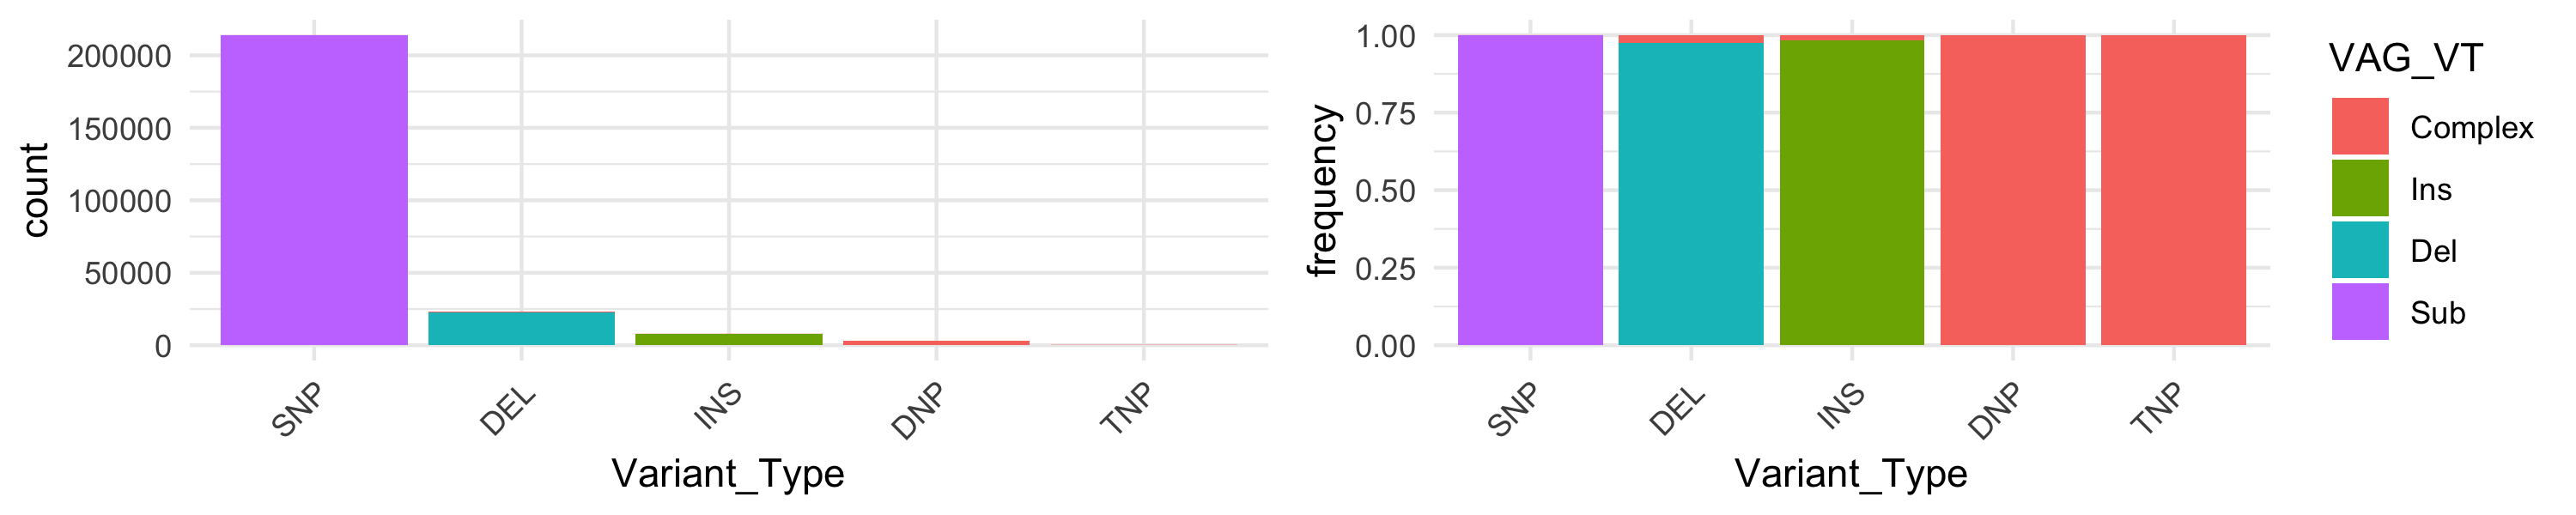

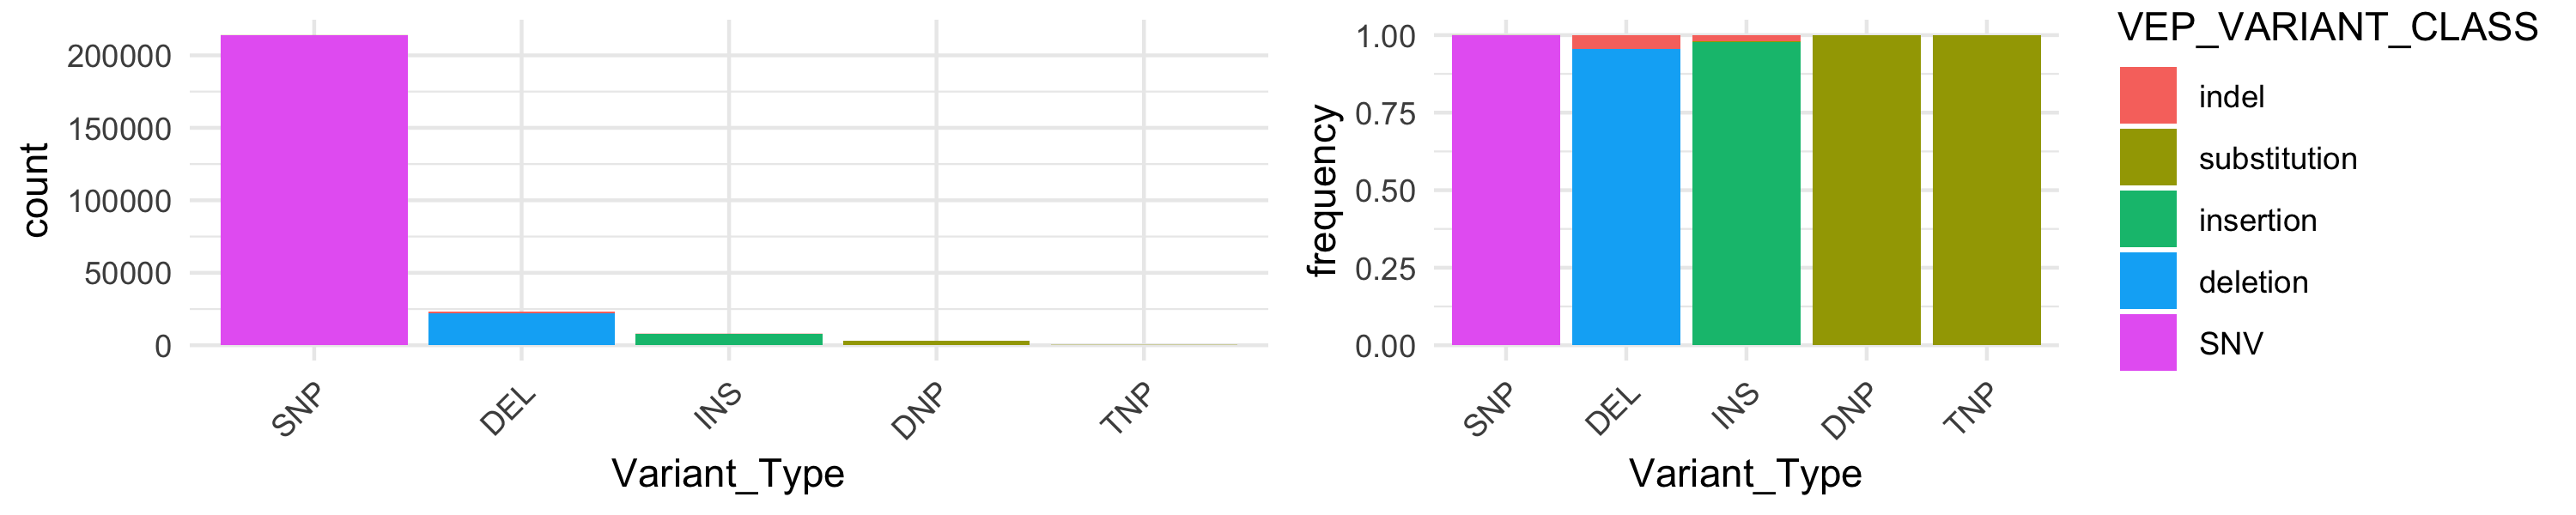

In [44]:
table(impact$Variant_Type, impact$VAG_VT)
table(impact$Variant_Type, impact$VEP_VARIANT_CLASS)

plot_contingency_table_as_histograms(impact, "Variant_Type", "VAG_VT", height = 2)
plot_contingency_table_as_histograms(impact, "Variant_Type", "VEP_VARIANT_CLASS", height = 2)

### `Consequence` vs `VAG_EFFECT` vs `VEP_Consequence`

values                                         count  freq 
1  non_synonymous_codon                           142069 57.2%
2  synonymous_codon                                50400 20.3%
3  frameshift_variant                              23849 9.6% 
4  stop_gained                                     17906 7.2% 
5  splice_site_variant                              5709 2.3% 
6  inframe_codon_loss                               3782 1.5% 
7  complex_change_in_transcript                     1109 0.4% 
8  extended_intronic_splice_region_variant           965 0.4% 
9  inframe_codon_gain                                872 0.4% 
10 inframe_variant                                   505 0.2% 
11 intron_variant                                    402 0.2% 
12 initiator_codon_change                            206 0.1% 
13 unknown                                           158 0.1% 
14 5_prime_UTR_variant                               132 0.1% 
15 stop_retained_variant                              56 0%   
16 stop_lost                                          25 0%   
17 5KB_downstream_variant                             18 0%   
18 500B_downstream_variant                            12 0%   
19 3_prime_UTR_variant                                11 0%   
20 5KB_upstream_variant                                9 0%   
21 2KB_upstream_variant                                6 0%   
22 5_prime_UTR_premature_start_codon_gain_variant      5 0%   
23 -- total --                                    248206 100%

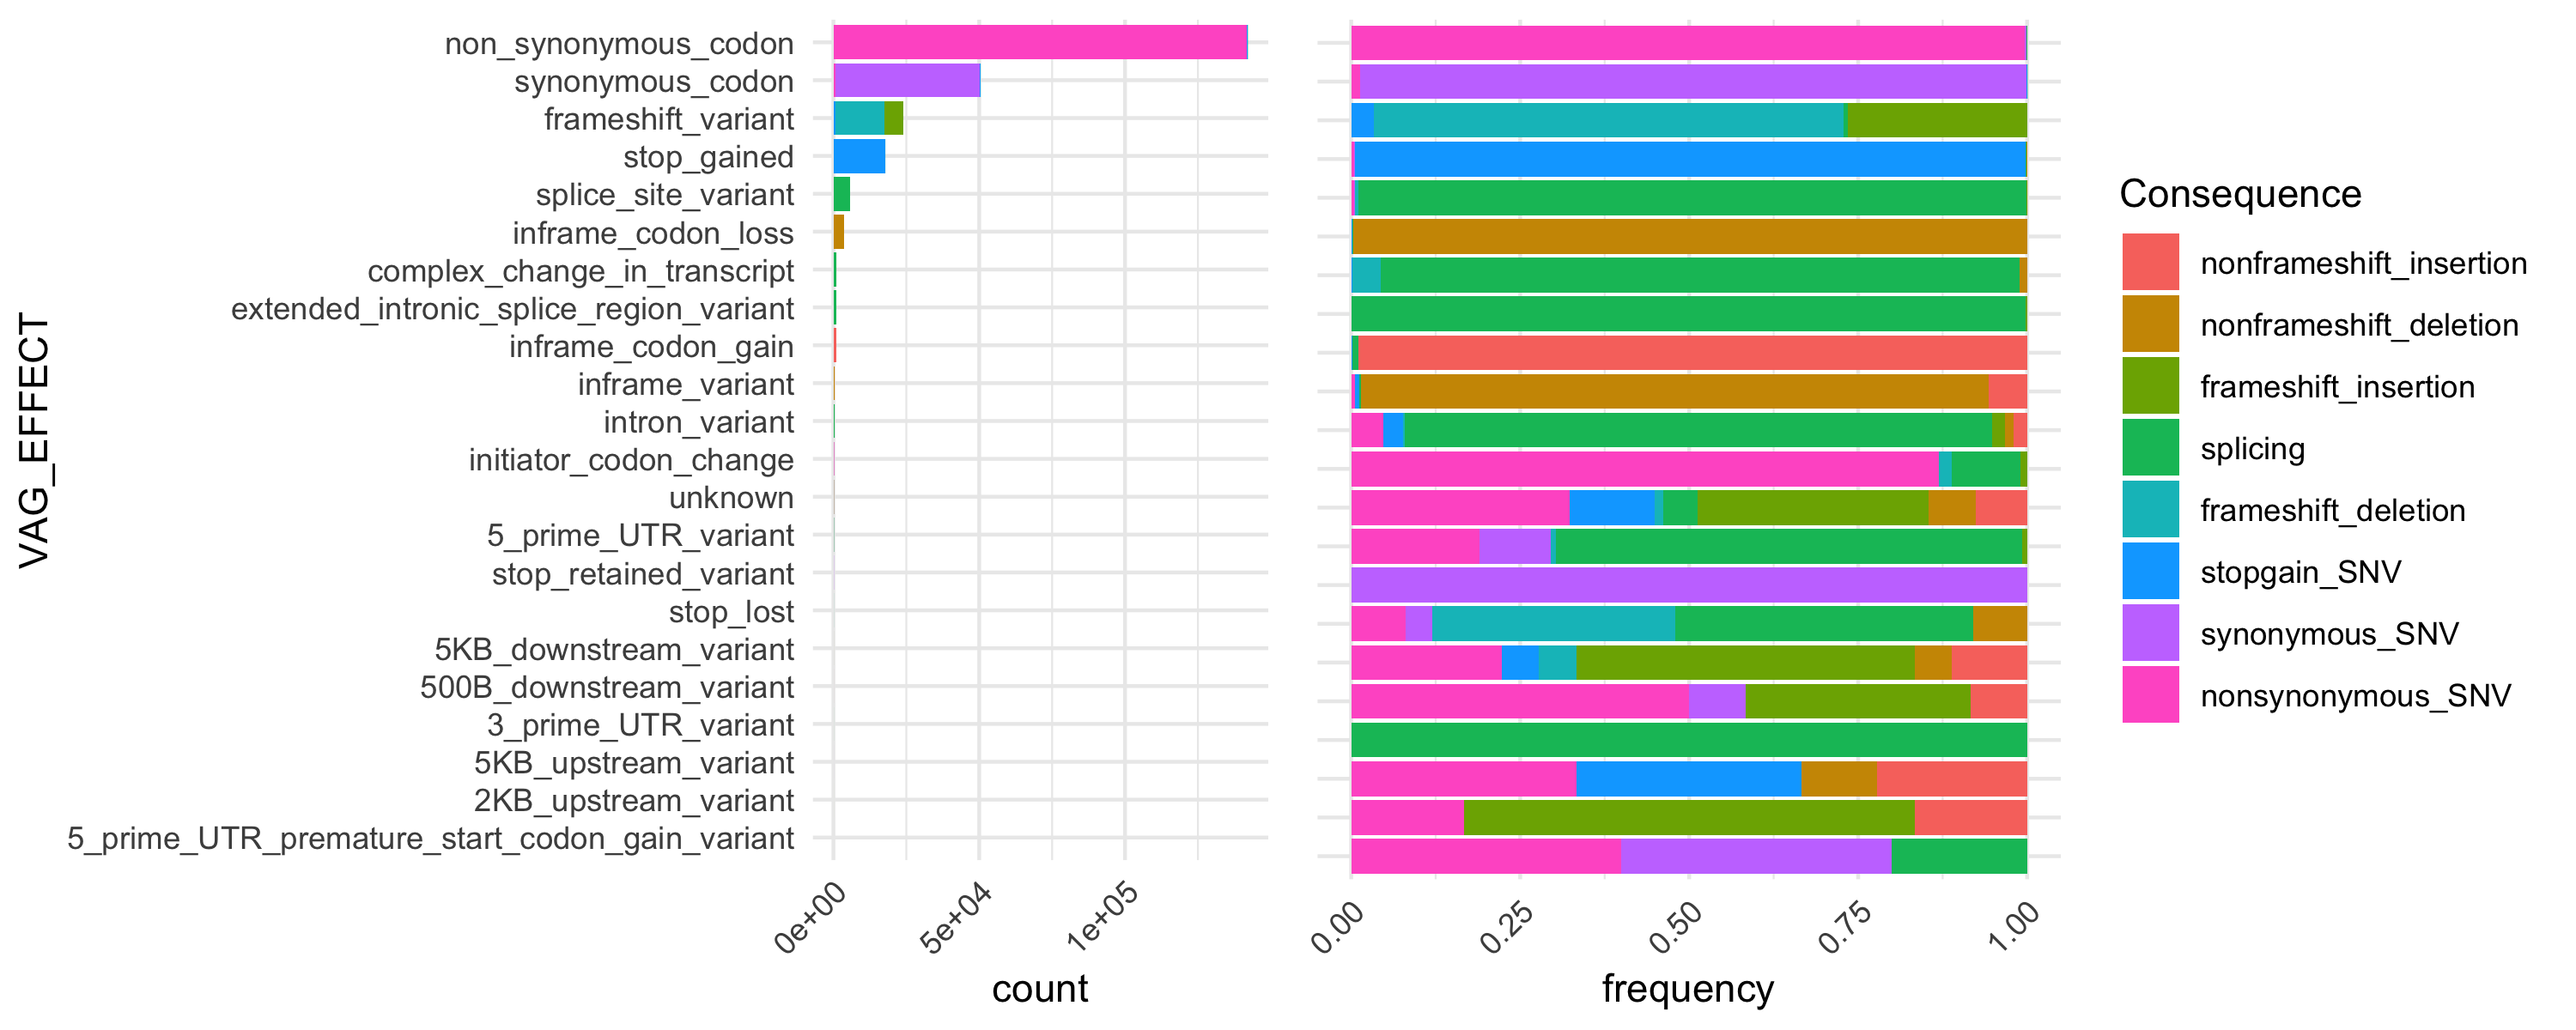

In [45]:
get_table(impact$VAG_EFFECT)
plot_contingency_table_as_histograms(impact, "VAG_EFFECT", "Consequence", height = 4, flip = TRUE)

values                             count  freq 
1  missense_variant                   142828 57.5%
2  synonymous_variant                  47768 19.2%
3  frameshift_variant                  23665 9.5% 
4  stop_gained                         18420 7.4% 
5  splice_acceptor_variant              3985 1.6% 
6  inframe_deletion                     3939 1.6% 
7  splice_donor_variant                 3189 1.3% 
8  splice_region_variant                2426 1%   
9  inframe_insertion                     871 0.4% 
10 intron_variant                        310 0.1% 
11 protein_altering_variant              272 0.1% 
12 start_lost                            257 0.1% 
13 stop_lost                             103 0%   
14 stop_retained_variant                  57 0%   
15 intergenic_variant                     49 0%   
16 5_prime_UTR_variant                    42 0%   
17 downstream_gene_variant                10 0%   
18 upstream_gene_variant                   6 0%   
19 3_prime_UTR_variant                     3 0%   
20 non_coding_transcript_exon_variant      2 0%   
21 incomplete_terminal_codon_variant       2 0%   
22 coding_sequence_variant                 2 0%   
23 -- total --                        248206 100%

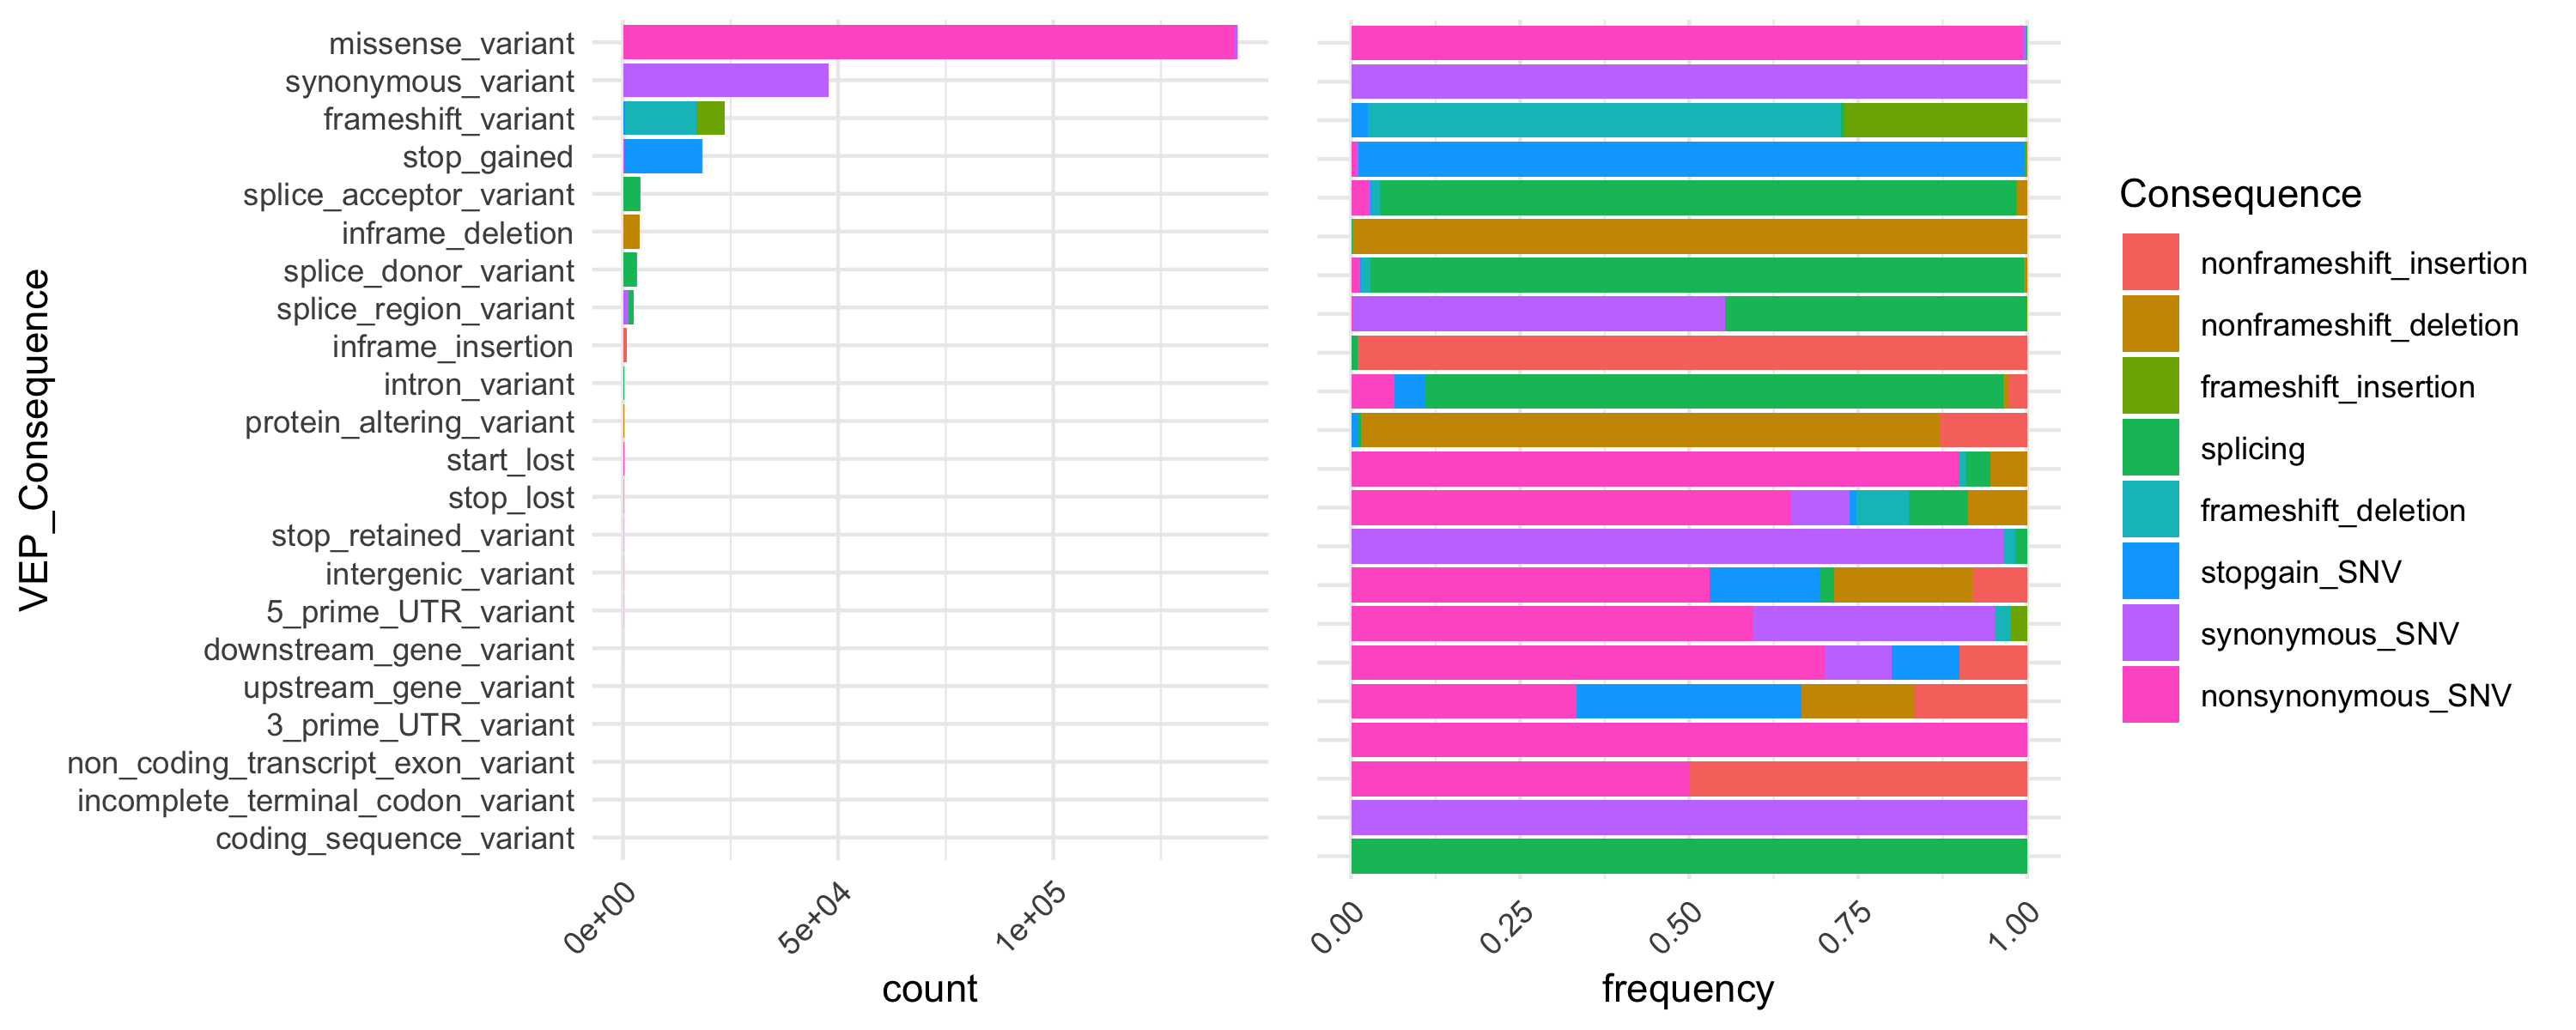

In [46]:
get_table(impact$VEP_Consequence)
plot_contingency_table_as_histograms(impact, "VEP_Consequence", "Consequence", height = 4, flip = TRUE)

In [47]:
dd <- impact[impact$Consequence == "synonymous_SNV" & impact$VEP_Consequence != "synonymous_variant",]
get_table(impact$VEP_Consequence[impact$Consequence == "synonymous_SNV" & impact$VEP_Consequence != "synonymous_variant"])

values                            count freq 
1  splice_region_variant             1337  59.3%
2  missense_variant                   766  34%  
3  stop_retained_variant               55  2.4% 
4  stop_gained                         52  2.3% 
5  5_prime_UTR_variant                 15  0.7% 
6  splice_acceptor_variant             11  0.5% 
7  stop_lost                            9  0.4% 
8  splice_donor_variant                 6  0.3% 
9  incomplete_terminal_codon_variant    2  0.1% 
10 downstream_gene_variant              1  0%   
11 -- total --                       2254  100%

Three `TP53` synonymous mutations studied in other nb:

In [48]:
for (key in c("17_7579312_C_T","17_7579312_C_A", "17_7578177_C_T"))
    print(print_count_and_proportion(nrow(dd[dd$mut_key == key,]), nrow(impact[impact$mut_key == key,])))

[1] "36 over 36 (100.00%)"
[1] "35 over 35 (100.00%)"
[1] "11 over 11 (100.00%)"


### `Hugo_Symbol` vs `VEP_SYMBOL`

In [49]:
compare_features_3 <- function(data, feature_1_name, feature_2_name, feature_3_name) {
    dd <- data[data[,feature_1_name] != data[,feature_2_name] |
               data[,feature_1_name] != data[,feature_3_name] |
               data[,feature_2_name] != data[,feature_3_name], c(feature_1_name, feature_2_name, feature_3_name)]
    print(print_count_and_proportion(nrow(dd), nrow(data)))
    print(print_count_and_proportion(nrow(unique(dd)),
                                     nrow(unique(data[,c(feature_1_name, feature_2_name, feature_3_name)]))))

    rownames(dd) <- NULL
    return(unique(dd))
}

compare_features <- function(data, feature_1_name, feature_2_name) {
    
    dd <- data %>% group_by(!!sym(feature_1_name), !!sym(feature_2_name)) %>%
                   filter(!!sym(feature_1_name) != !!sym(feature_2_name)) %>%
                   summarise(count = n(), feature_2_name = unique(!!sym(feature_2_name))) %>%
                   select(!!sym(feature_1_name), !!sym(feature_2_name), count) %>%
                   arrange(-count, !!sym(feature_1_name))    
    
    print(print_count_and_proportion(nrow(dd), length(unique(data[,feature_1_name]))))
    print(print_count_and_proportion(sum(dd$count), nrow(data)))

    return(dd)
}

In [445]:
dd <- compare_features(impact, "Hugo_Symbol", "VEP_SYMBOL")
head(dd, 20)

[1] "149 over 475 (31.37%)"
[1] "3388 over 248206 (1.36%)"


Hugo_Symbol  VEP_SYMBOL     count
1  PAK5         PAK7           922  
2  PRKN         PARK2          392  
3  COP1         RFWD2          343  
4  MRE11        MRE11A         313  
5  NSD2         WHSC1          301  
6  NSD3         WHSC1L1        239  
7  TENT5C       FAM46C         231  
8  ABRAXAS1     FAM175A        124  
9  KMT5A        SETD8          105  
10 CCNQ         FAM58A         103  
11 CDKN2Ap14ARF CDKN2A          56  
12 ELOC         TCEB1           38  
13 CEBPA        AC008738.1      36  
14 FLCN         RP11-45M22.4     7  
15 RBM10        NDUFB11          7  
16 RTEL1        RTEL1-TNFRSF6B   7  
17 CARD11       AC004906.3       5  
18 MEF2B        MEF2BNB-MEF2B    5  
19 ALOX12B      AC129492.6       3  
20 BABAM1       CTD-2278I10.6    3

### `cDNA_change` vs `VAG_cDNA_CHANGE` vs `VEP_HGVSc`

In [446]:
head(compare_features(impact, "cDNA_change", "VAG_cDNA_CHANGE"))
head(compare_features(impact, "cDNA_change", "VEP_HGVSc"))

[1] "23660 over 74678 (31.68%)"
[1] "34261 over 248206 (13.80%)"


cDNA_change VAG_cDNA_CHANGE count
1 c.602G>A    c.2531G>A       120  
2 c.4666dupA  c.4660_4661insA 106  
3 c.1148delA  c.1141delA       94  
4 c.1403delA  c.1446delA       87  
5 c.601C>T    c.2530C>T        84  
6 c.610dupA   c.603_604insA    78

[1] "25112 over 74678 (33.63%)"
[1] "40229 over 248206 (16.21%)"


cDNA_change                   VEP_HGVSc      count
1 c.1976delG                    c.1976del      211  
2 c.2235_2249delGGAATTAAGAGAAGC c.2235_2249del 165  
3 c.602G>A                      c.2531G>A      120  
4 c.4666dupA                    c.4666dup      106  
5 c.2236_2250delGAATTAAGAGAAGCA c.2236_2250del  96  
6 c.1148delA                    c.1148del       94

### `HGVSp_Short` vs `VAG_PROTEIN_CHANGE` vs `VEP_HGVSp`

In [447]:
head(compare_features(impact, "HGVSp_Short", "VAG_PROTEIN_CHANGE"))
head(compare_features(impact, "HGVSp_Short", "VEP_HGVSp"))

[1] "27502 over 112442 (24.46%)"
[1] "48354 over 248206 (19.48%)"


HGVSp_Short    VAG_PROTEIN_CHANGE  count
1                p.?                 3140 
2                unknown              263 
3 p.E746_A750del p.E746_A750delELREA  261 
4 p.G659Vfs*41   p.G659fs*41          211 
5 p.R201H        p.R844H              120 
6 p.X307_splice  p.?                  116

[1] "33536 over 112442 (29.83%)"
[1] "71978 over 248206 (29.00%)"


HGVSp_Short   VEP_HGVSp    count
1               unknown      3481 
2 p.R201H       p.R844H       120 
3 p.X307_splice unknown       118 
4 p.X187_splice unknown       103 
5 p.X126_splice unknown        98 
6 p.P408Afs*99  p.P409Afs*99   88

## Other VEP annotations

### `VEP_Amino_acids`

In [449]:
head(impact[, c("VEP_Amino_acids", "HGVSp_Short", "Consequence")], 10)

VEP_Amino_acids HGVSp_Short Consequence      
1  T/P             p.T256P     nonsynonymous_SNV
2  P               p.P1618P    synonymous_SNV   
3  L               p.L484L     synonymous_SNV   
4  I/M             p.I298M     nonsynonymous_SNV
5  R/M             p.R2431M    nonsynonymous_SNV
6  L/M             p.L465M     nonsynonymous_SNV
7  unknown                     splicing         
8  G/*             p.G61*      stopgain_SNV     
9  P/S             p.P482S     nonsynonymous_SNV
10 E/*             p.E302*     stopgain_SNV

### `VEP_BIOTYPE`

In [450]:
get_table(impact$VEP_BIOTYPE)

values                             count  freq 
1  protein_coding                     247557 99.7%
2  nonsense_mediated_decay               494 0.2% 
3  unknown                                49 0%   
4  pseudogene                             36 0%   
5  antisense                              25 0%   
6  processed_transcript                   16 0%   
7  retained_intron                        15 0%   
8  lincRNA                                10 0%   
9  unprocessed_pseudogene                  1 0%   
10 transcribed_unprocessed_pseudogene      1 0%   
11 processed_pseudogene                    1 0%   
12 miRNA                                   1 0%   
13 -- total --                        248206 100%

### `VEP_IMPACT` and `VEP_CLIN_SIG`

In [451]:
get_table(impact$VEP_IMPACT)
get_table(impact$VEP_CLIN_SIG) %>% filter(count >= 200)

values      count  freq 
1 MODERATE    147910 59.6%
2 LOW          50253 20.2%
3 HIGH         49619 20%  
4 MODIFIER       424 0.2% 
5 -- total -- 248206 100%

values                                                           count 
1  unknown                                                          215110
2  likely_pathogenic&pathogenic                                       8554
3  not_provided&likely_pathogenic&pathogenic                          4912
4  pathogenic                                                         3655
5  uncertain_significance                                             3594
6  likely_pathogenic                                                  3273
7  likely_benign                                                      1823
8  uncertain_significance&likely_pathogenic                            842
9  benign&likely_benign                                                689
10 benign                                                              675
11 not_provided                                                        654
12 uncertain_significance&pathogenic                                   633
13 likely_pathogenic&pathogenic&drug_response                          599
14 uncertain_significance&likely_pathogenic&pathogenic                 554
15 drug_response                                                       384
16 uncertain_significance&likely_benign                                352
17 uncertain_significance&not_provided&likely_pathogenic&pathogenic    313
18 not_provided&pathogenic                                             228
19 -- total --                                                      248206
   freq 
1  86.7%
2  3.4% 
3  2%   
4  1.5% 
5  1.4% 
6  1.3% 
7  0.7% 
8  0.3% 
9  0.3% 
10 0.3% 
11 0.3% 
12 0.3% 
13 0.2% 
14 0.2% 
15 0.2% 
16 0.1% 
17 0.1% 
18 0.1% 
19 100%

### VEP SIFT and PolyPhen annotations

In [452]:
get_table(impact$VEP_SIFT_class)
get_table(impact$VEP_PolyPhen_class)

values                     count  freq 
1 unknown                    106989 43.1%
2 deleterious                 81511 32.8%
3 tolerated                   44401 17.9%
4 deleterious_low_confidence   8663 3.5% 
5 tolerated_low_confidence     6642 2.7% 
6 -- total --                248206 100%

values            count  freq 
1 unknown           106242 42.8%
2 probably_damaging  61208 24.7%
3 benign             56240 22.7%
4 possibly_damaging  24516 9.9% 
5 -- total --       248206 100%

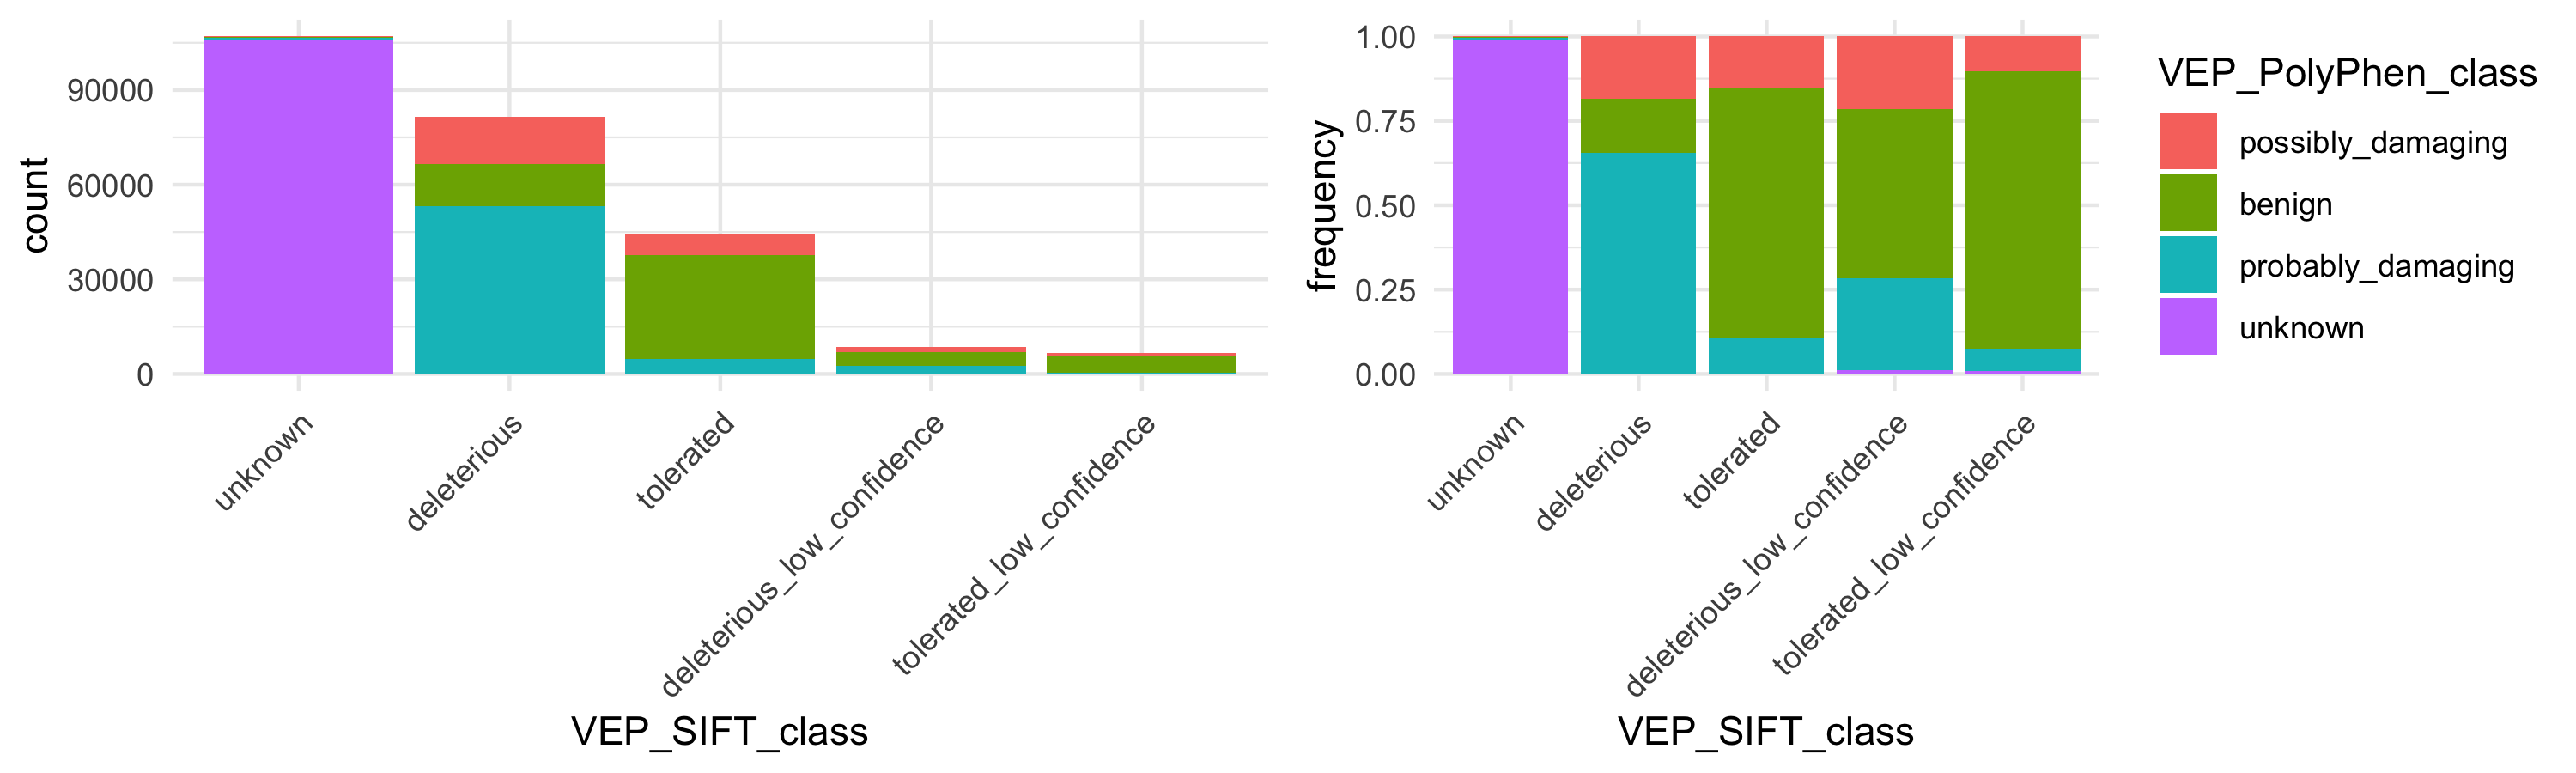

In [453]:
plot_contingency_table_as_histograms(impact, "VEP_SIFT_class", "VEP_PolyPhen_class")

In [454]:
impact_temp <- impact[impact$VEP_SIFT_class != "unknown" & impact$VEP_PolyPhen_class != "unknown",]

Warning sqrt y scale.

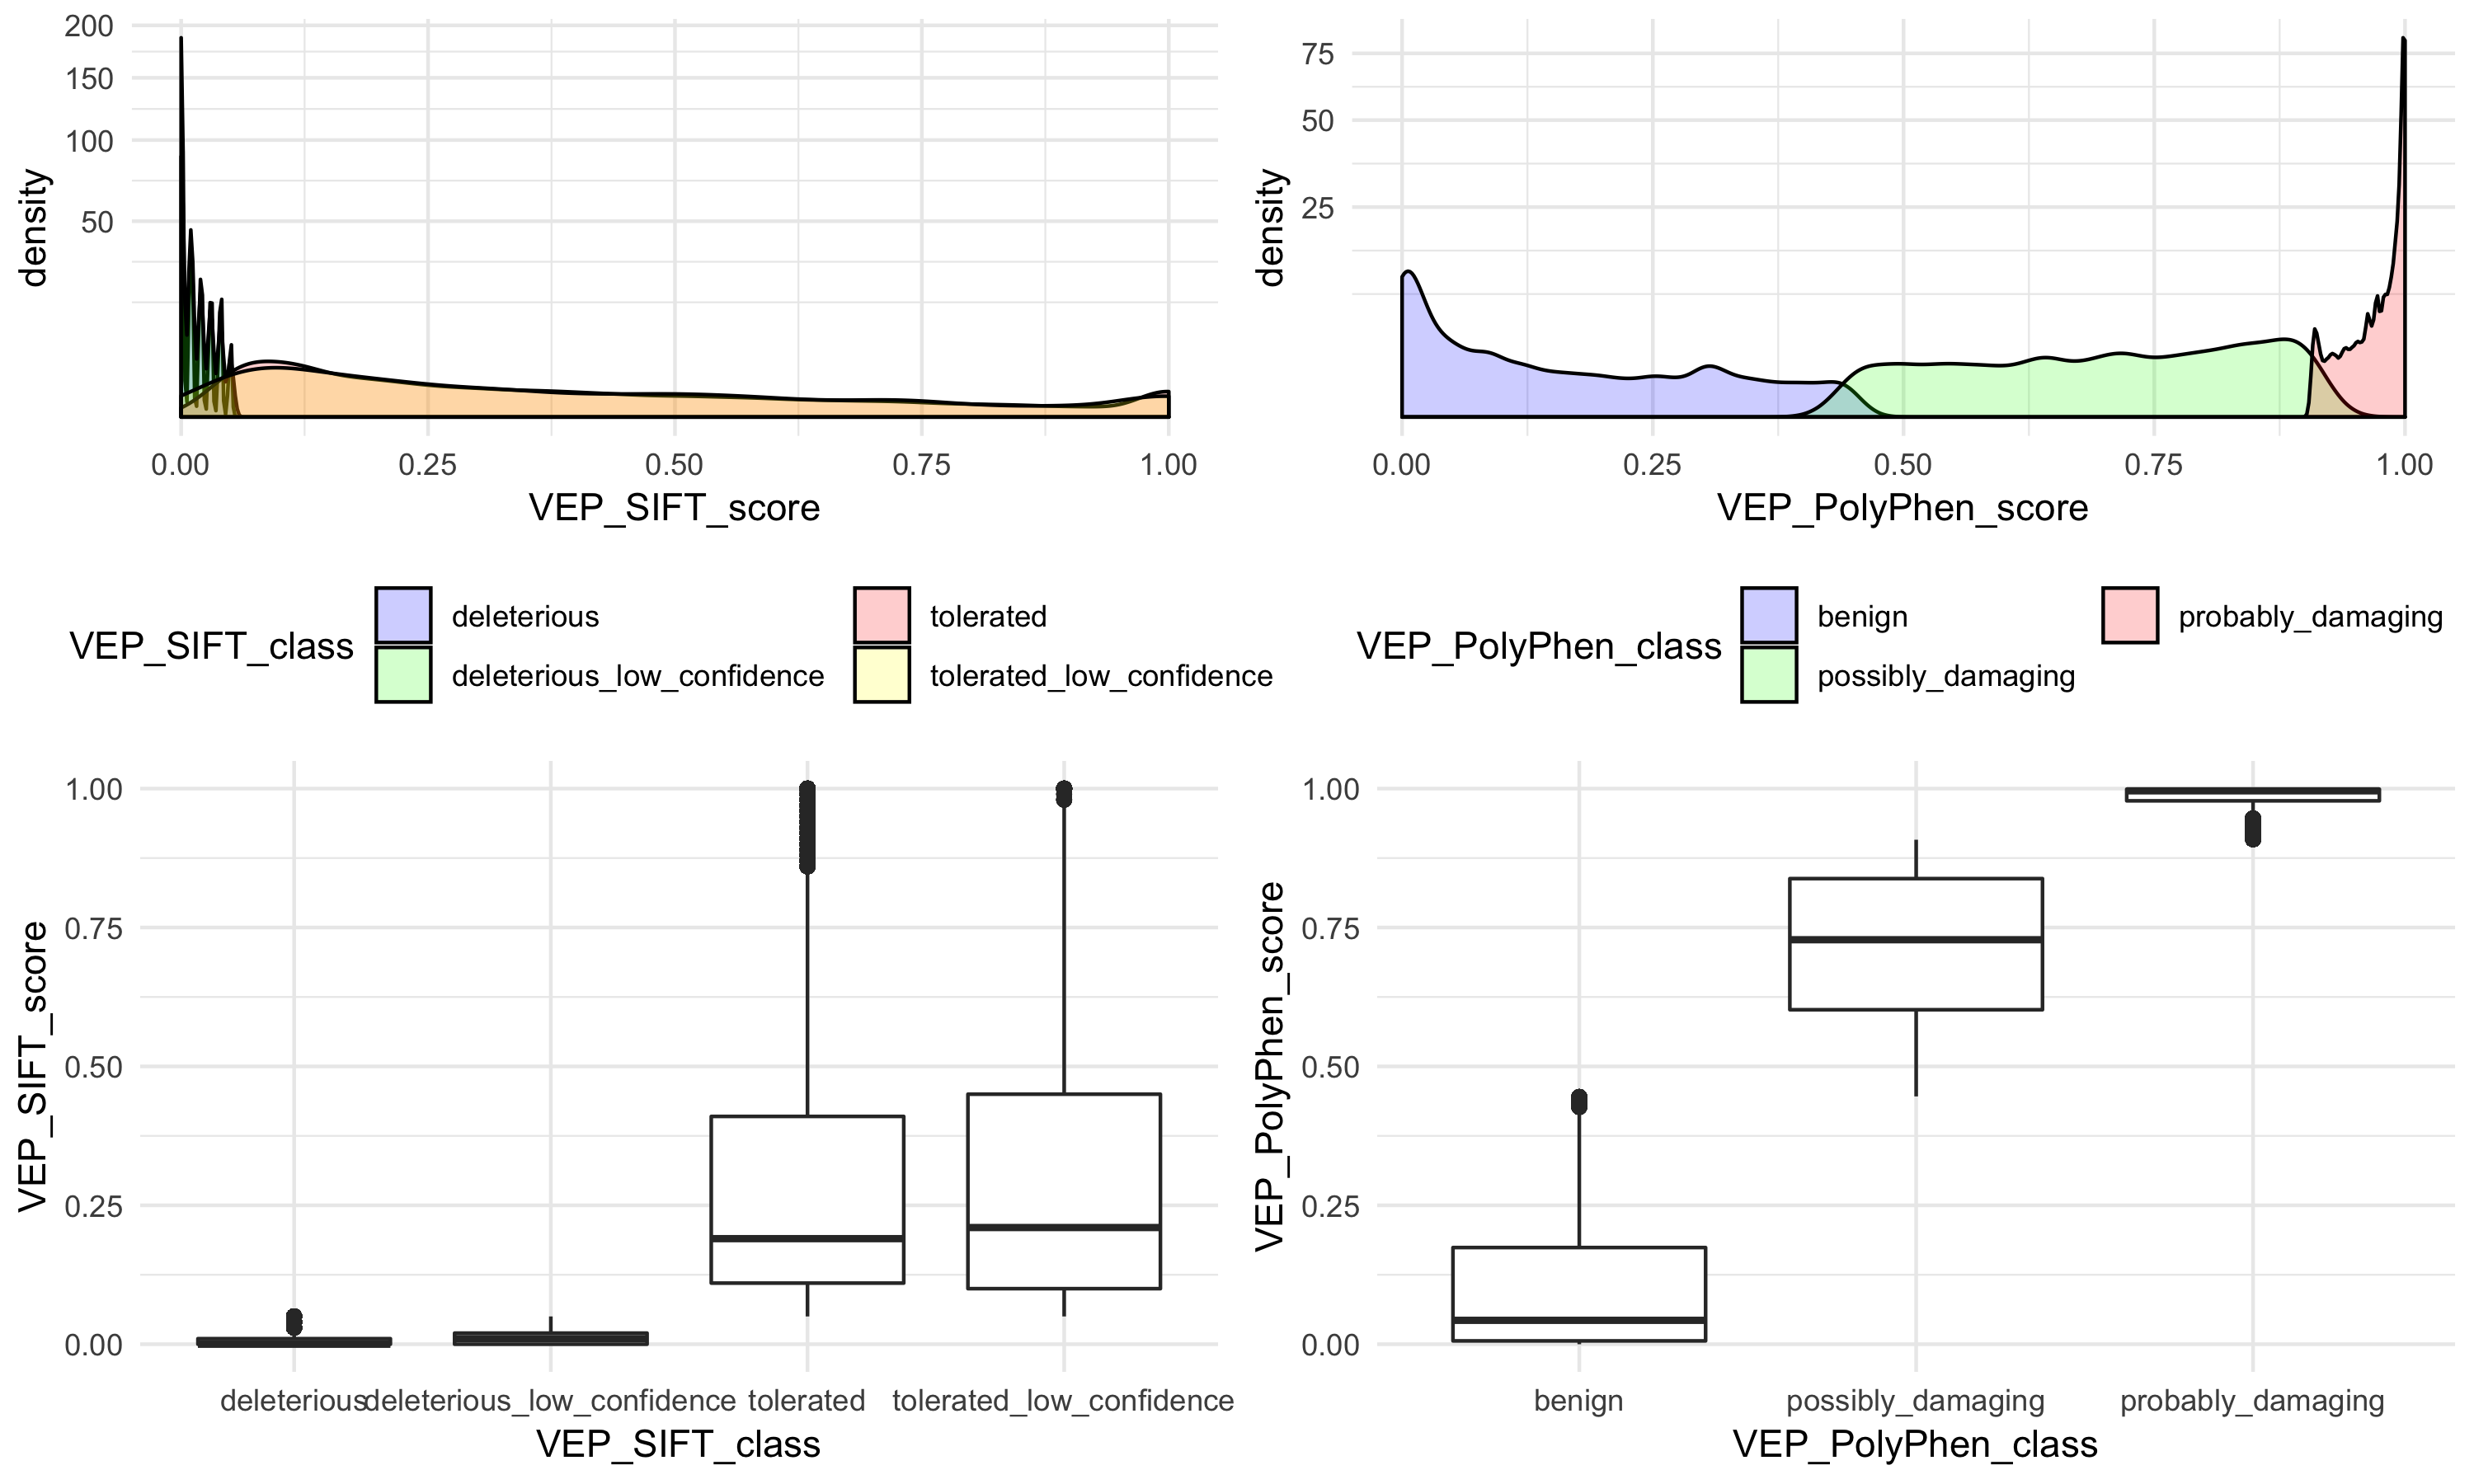

In [455]:
plot1 <- plot_density(impact_temp, "VEP_SIFT_score", fill = "VEP_SIFT_class") + theme(legend.position="bottom") + guides(fill = guide_legend(ncol = 2)) + scale_y_sqrt()
plot2 <- plot_density(impact_temp, "VEP_PolyPhen_score", fill = "VEP_PolyPhen_class") + theme(legend.position="bottom") + guides(fill = guide_legend(ncol = 2)) + scale_y_sqrt()
plot3 <- ggplot(impact_temp) + geom_boxplot(aes(VEP_SIFT_class, VEP_SIFT_score))
plot4 <- ggplot(impact_temp) + geom_boxplot(aes(VEP_PolyPhen_class, VEP_PolyPhen_score))
notebook_plot_size(10, 6)
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)

In [456]:
impact$VEP_PolyPhen_score <- 1 - impact$VEP_PolyPhen_score

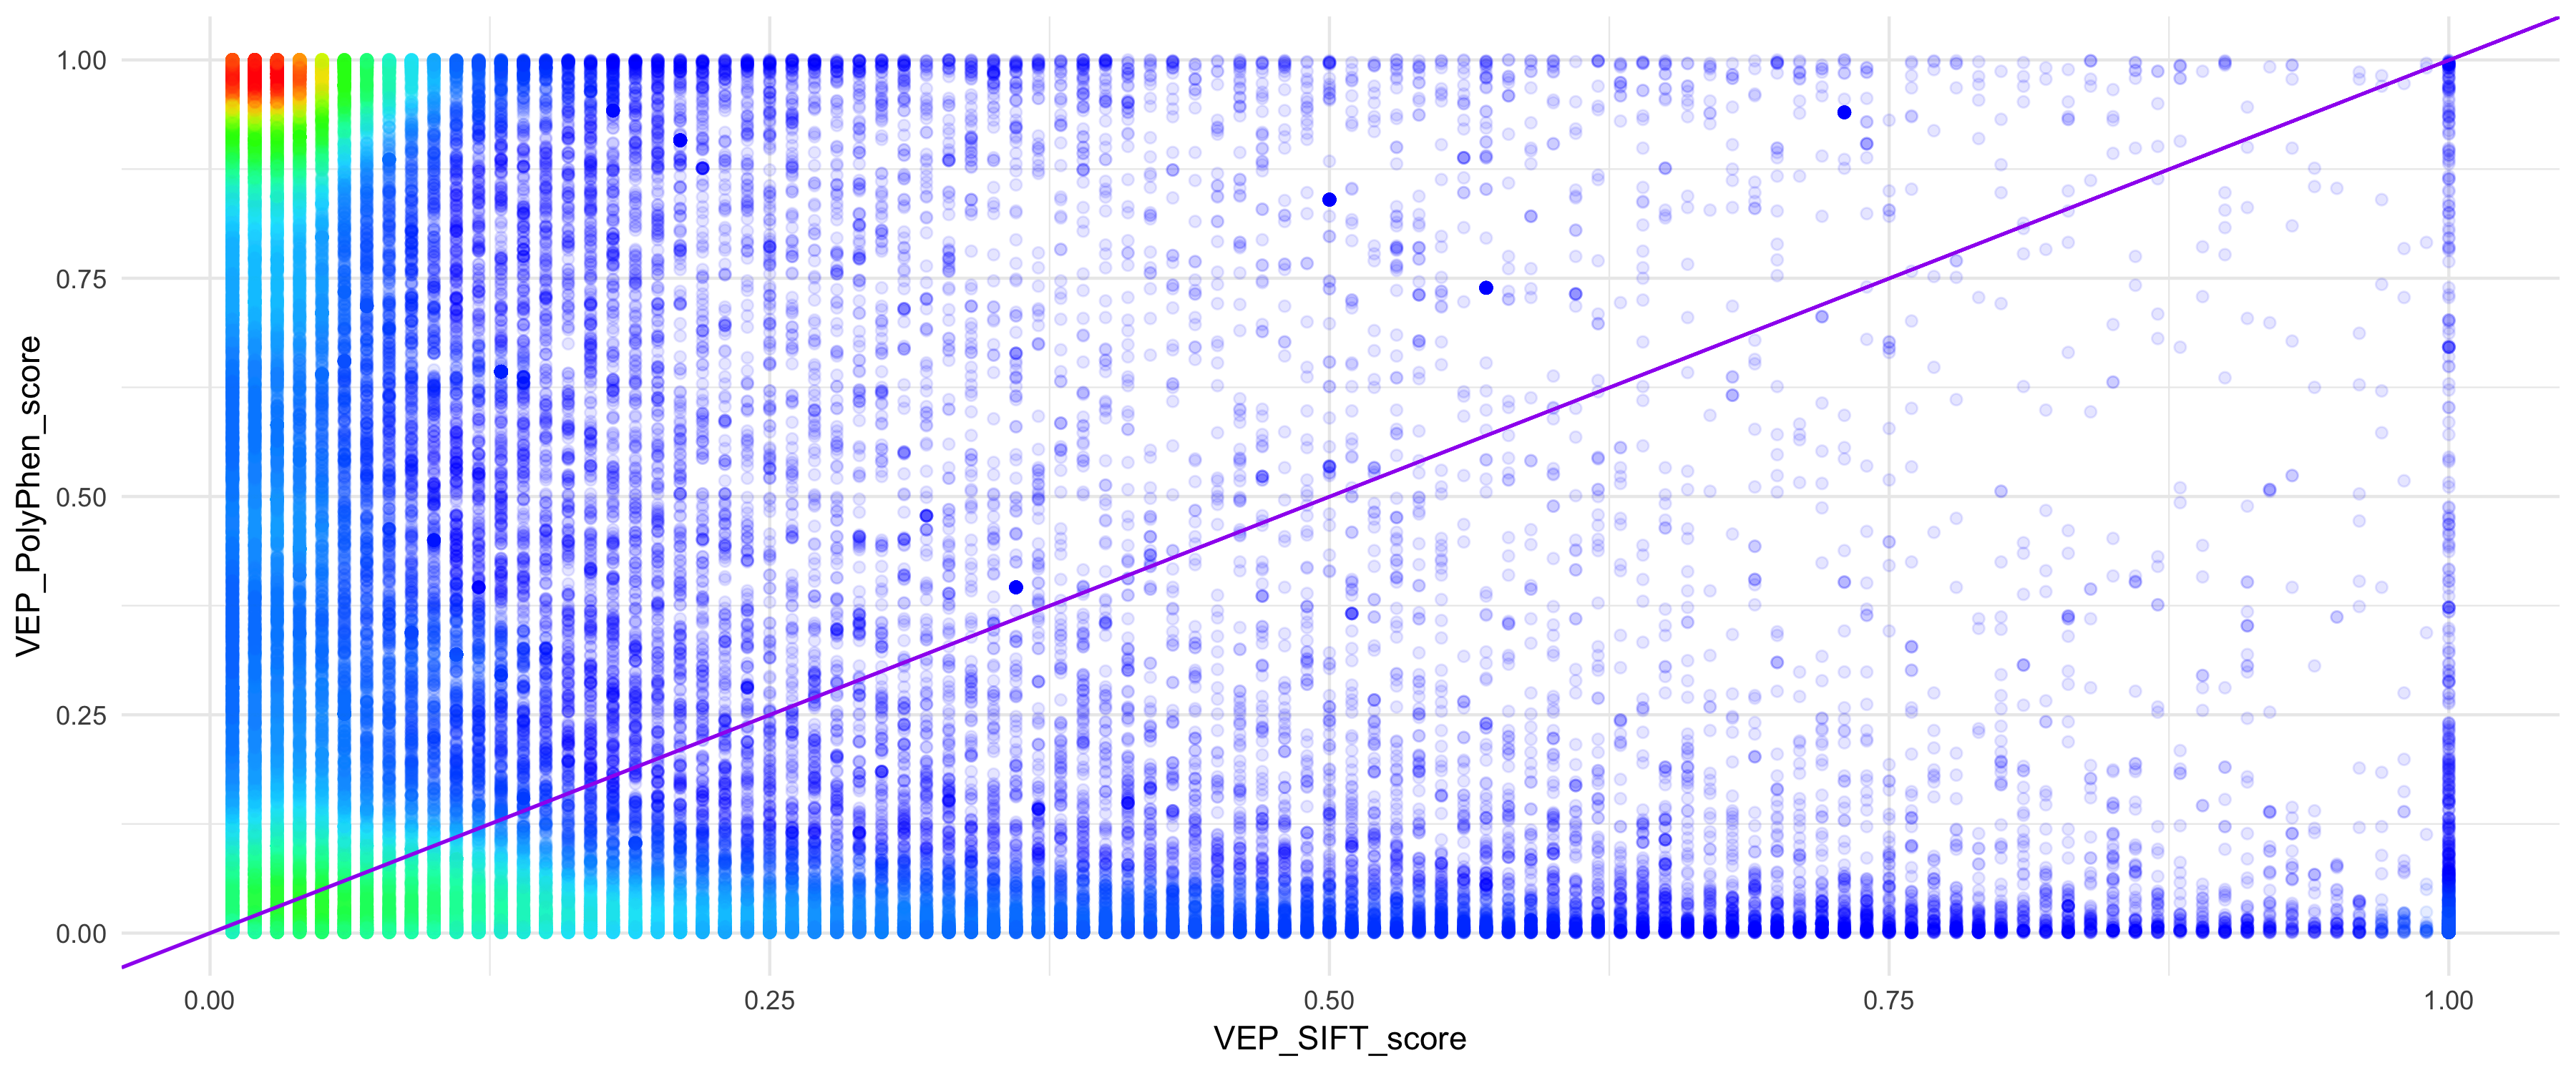

In [457]:
plot_density_2d(impact_temp[impact_temp$VEP_SIFT_score != 0 & impact_temp$VEP_PolyPhen_score != 0,],
                "VEP_SIFT_score", "VEP_PolyPhen_score", points_only = TRUE, height = 5) + geom_abline(intercept = 0, slope = 1, color = "purple", size = 0.6)

### VEP AF annotations

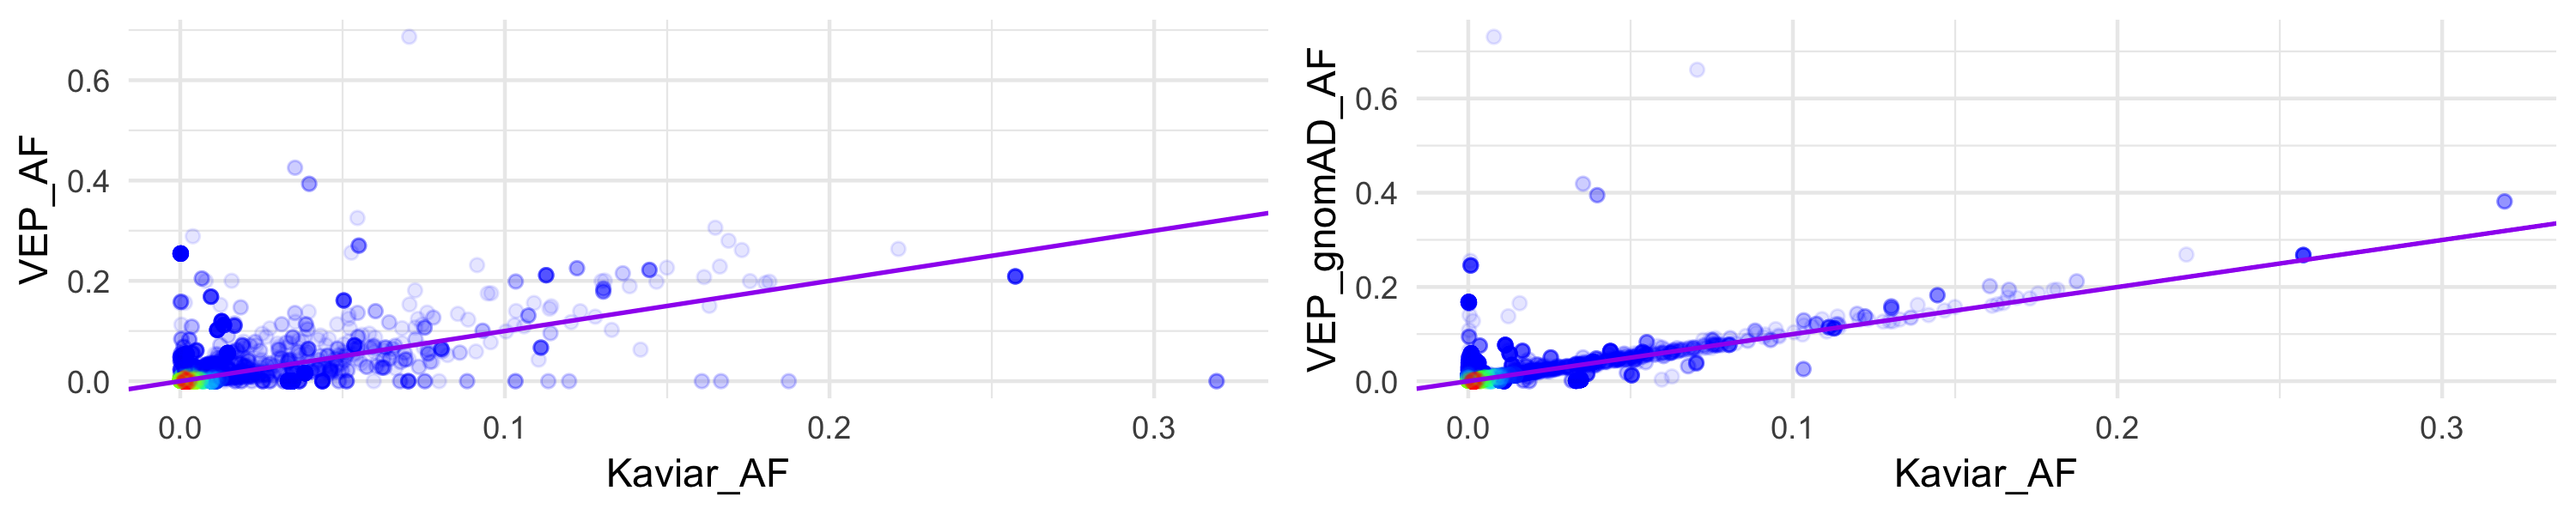

In [461]:
plot1 <- plot_density_2d(impact[impact$Kaviar_AF > 0.001 | impact$VEP_AF > 0.001,], "Kaviar_AF", "VEP_AF", points_only = TRUE, height = 3) + geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot2 <- plot_density_2d(impact[impact$Kaviar_AF > 0.001 | impact$VEP_gnomAD_AF > 0.001,], "Kaviar_AF", "VEP_gnomAD_AF", points_only = TRUE, height = 3) + geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot_side_by_side(plot1, plot2)

Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”

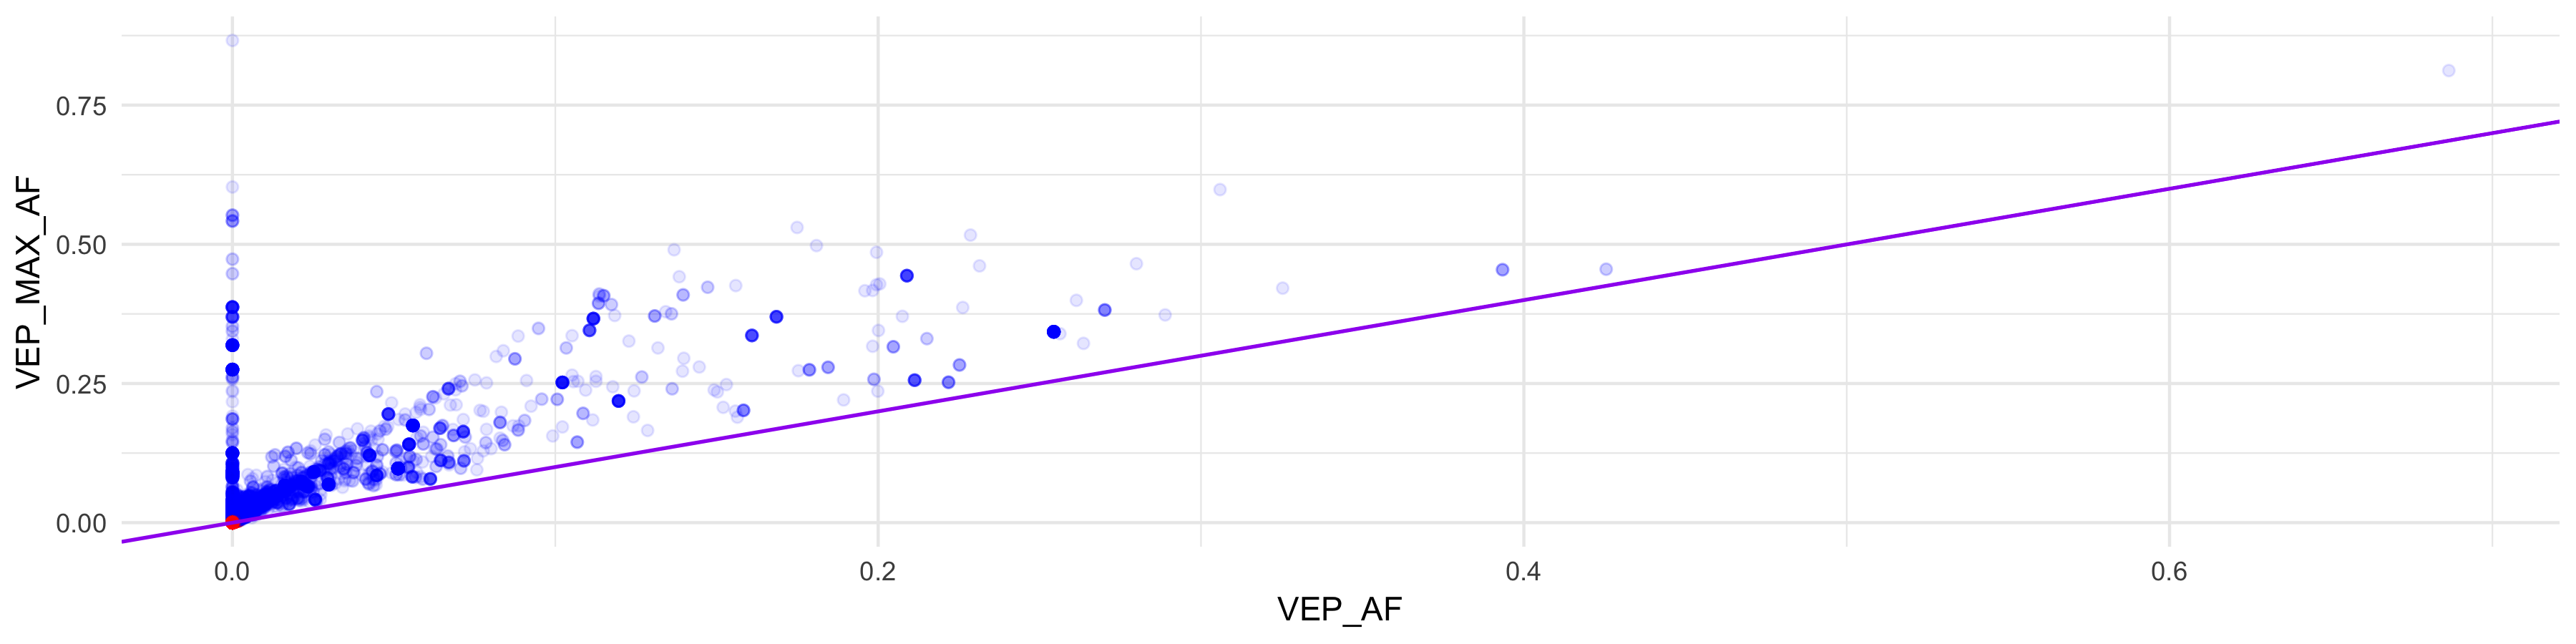

In [464]:
plot_density_2d(impact, "VEP_AF", "VEP_MAX_AF", points_only = TRUE, height = 3) + geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)

In [469]:
get_table(impact$VEP_MAX_AF_POPS) %>% filter(count >= 3000)

values                                                                                 
1 unknown                                                                                
2 gnomAD_NFE                                                                             
3 gnomAD_SAS                                                                             
4 gnomAD_AFR&gnomAD_AMR&gnomAD_ASJ&gnomAD_EAS&gnomAD_FIN&gnomAD_NFE&gnomAD_OTH&gnomAD_SAS
5 gnomAD_EAS                                                                             
6 gnomAD_AFR                                                                             
7 gnomAD_AMR                                                                             
8 EA                                                                                     
9 -- total --                                                                            
  count  freq 
1 191563 77.2%
2  11414 4.6% 
3   5551 2.2% 
4   5066 2%   
5   3970 1.6% 
6   3932 1.6% 
7   3830 1.5% 
8   3119 1.3% 
9 248206 100%

### VEP COSMIC_CNT annotations

Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”

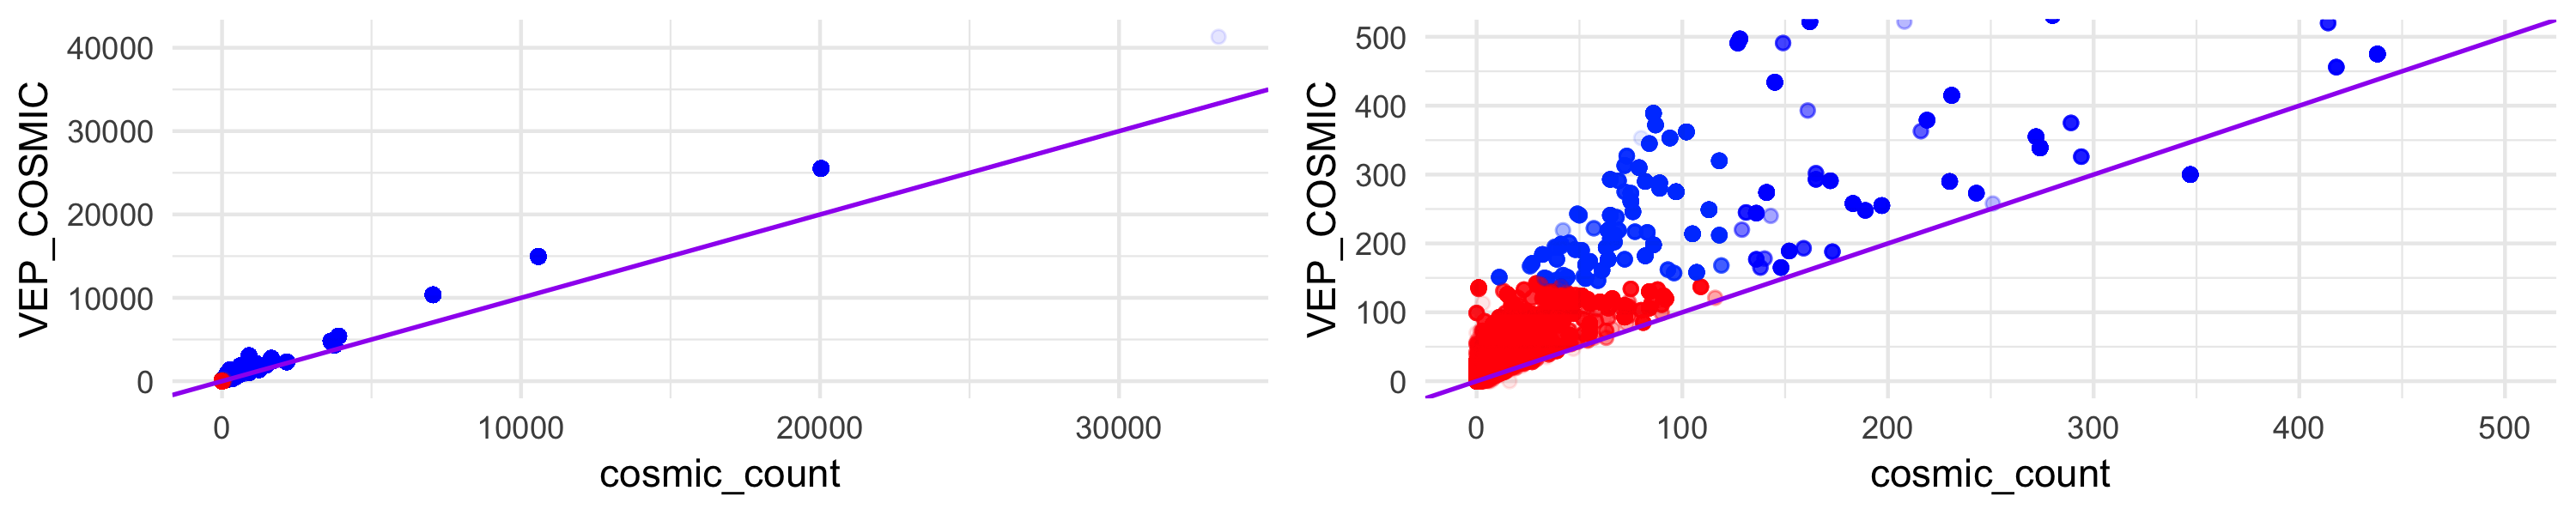

In [50]:
plot1 <- plot_density_2d(impact[impact$cosmic_count > 0 | impact$VEP_COSMIC_CNT > 0,],
                "cosmic_count", "VEP_COSMIC", points_only = TRUE) + 
         geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot2 <- plot1 + coord_cartesian(xlim = c(0:500), ylim = c(0:500))

plot_side_by_side(plot1, plot2)

In [51]:
nrow(impact[impact$cosmic_count == 0 & impact$VEP_COSMIC_CNT > 5,])
nrow(impact[impact$cosmic_count > 5  & impact$VEP_COSMIC_CNT == 0,])

[1] 175022

[1] 0